# **Project Name**    -



#**Zomato Market Analysis: Restaurant Clustering and Customer Sentiment**



##### **Project Type**    - EDA/Regression/Classification/Unsupervised
##### **Contribution**    - Individual/Team
##### **Team Member 1 -**   Dhruv Tamirisa
##### **Team Member 2 -**
##### **Team Member 3 -**
##### **Team Member 4 -**

# **Project Summary -**

##Zomato Restaurant Analysis and Clustering
Zomato, a leading food delivery and restaurant aggregator in India, operates in a market renowned for its vast culinary diversity. This project harnesses the power of machine learning and data analysis to dissect Zomato's extensive dataset, aiming to derive actionable insights that benefit both the customers and the company. The primary objectives were twofold: first, to perform an in-depth exploratory data analysis to understand the restaurant landscape across India, and second, to lay the groundwork for unsupervised machine learning to cluster restaurants into distinct segments and analyze user sentiment from review text.

The foundation of this project was built on two key datasets: one containing detailed metadata for thousands of restaurants, including their names, cuisines, and cost, and a second, larger dataset containing user-submitted reviews and ratings. The initial and most critical phase involved rigorous data wrangling and pre-processing to ensure the quality and integrity of the data. This included handling missing values through a strategic combination of row deletion for critical yet sparse missing data (like ratings) and imputation for categorical data (like restaurant collections). We corrected data types, most notably converting the 'Cost' column from a text object to a numerical type to enable mathematical analysis. Furthermore, we identified and removed duplicate entries for both restaurants and reviews to prevent skewed results, ensuring a clean and reliable dataset for analysis.

With a clean dataset, we moved into Exploratory Data Analysis (EDA), creating over fifteen visualizations using Matplotlib and Seaborn to uncover patterns and test initial hypotheses. Univariate analysis revealed that North Indian and Chinese are the most dominant cuisines and that the vast majority of restaurants are budget-friendly, costing under ₹800. Bivariate and multivariate analyses produced key insights, such as the fact that there is no strong linear correlation between a restaurant's cost and its rating, meaning expensive does not necessarily equal better. We also discovered that longer, more detailed reviews tend to be associated with more extreme ratings (either very high or very low), and we identified the cities with the highest average costs and ratings.

To prepare the data for machine learning, we performed feature engineering to create new, valuable variables. This involved extracting city names from restaurant URLs, calculating the length of review text to quantify review detail, and parsing reviewer metadata to extract numerical features like follower counts.

The final stage of the project focused on the application of machine learning. The primary goal was to use unsupervised learning techniques, such as K-Means clustering, to segment restaurants based on features like cost, cuisine type, and average rating. This clustering helps customers find restaurants that match their specific preferences and allows Zomato to understand the distinct groups within its partner ecosystem. Parallelly, the cleaned review text was prepared for sentiment analysis, which aims to move beyond simple star ratings and understand the why behind customer feedback, identifying what aspects like food, service, or ambiance drive positive or negative experiences.

In conclusion, this project provides a comprehensive framework for leveraging data to create tangible business value. The insights generated empower customers to make more informed choices while providing Zomato with a data-driven foundation to enhance marketing strategies, personalize user recommendations, and identify strategic growth opportunities.

# **GitHub Link -**

https://github.com/DhruvTamirisa

You can find this project in my profile under the same project name

# **Problem Statement**


Zomato users often struggle to find the perfect restaurant among thousands of choices, as simple ratings don't tell the whole story. At the same time, Zomato needs to better leverage its vast data to understand market trends and the true drivers of customer satisfaction. This project tackles these issues by using unsupervised machine learning to cluster restaurants into distinct, intuitive groups for better user recommendations. Additionally, it will apply sentiment analysis to customer reviews to move beyond star ratings and understand what specifically makes an experience positive or negative, providing actionable intelligence for both Zomato and its partner restaurants.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import re
import nltk
import warnings
warnings.filterwarnings('ignore')
sns.set_style('darkgrid')

### Dataset Loading

In [2]:
data1=pd.read_csv('Zomato Restaurant names and Metadata.csv')
data2=pd.read_csv('Zomato Restaurant reviews.csv')

### Dataset First View

In [3]:
data1.head()

,Name,Links,Cost,Collections,Cuisines,Timings
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,"1,300","Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM"
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,"1,200","Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no..."


In [4]:
data2.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0


### Dataset Rows & Columns count

In [5]:
data1.shape

(105, 6)

In [6]:
data2.shape

(10000, 7)

### Dataset Information

In [8]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Links        105 non-null    object
 2   Cost         105 non-null    object
 3   Collections  51 non-null     object
 4   Cuisines     105 non-null    object
 5   Timings      104 non-null    object
dtypes: object(6)
memory usage: 5.1+ KB


In [9]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Restaurant  10000 non-null  object
 1   Reviewer    9962 non-null   object
 2   Review      9955 non-null   object
 3   Rating      9962 non-null   object
 4   Metadata    9962 non-null   object
 5   Time        9962 non-null   object
 6   Pictures    10000 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 547.0+ KB


#### Duplicate Values

In [10]:
duplicates1=data1.duplicated().sum()
duplicates2=data2.duplicated().sum()
print(duplicates1)
print(duplicates2)

0
36


In [12]:
data1.drop_duplicates(inplace=True)
data1.drop_duplicates(subset=['Links'], inplace=True, keep='first')
data2.drop_duplicates(inplace=True)

#### Missing Values/Null Values

In [13]:
data1.isnull().sum()

,0
Name,0
Links,0
Cost,0
Collections,54
Cuisines,0
Timings,1


In [14]:
data2.isnull().sum()

,0
Restaurant,0
Reviewer,2
Review,9
Rating,2
Metadata,2
Time,2
Pictures,0


Visualzing Missing values

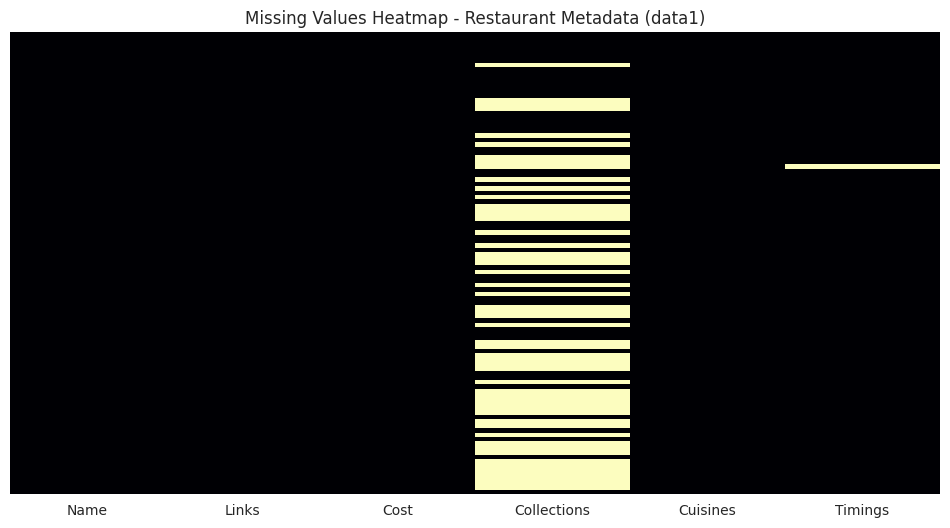

In [15]:
plt.figure(figsize=(12, 6))
sns.heatmap(data1.isnull(), cbar=False, yticklabels=False, cmap='magma')
plt.title('Missing Values Heatmap - Restaurant Metadata (data1)')
plt.savefig('missing_values_metadata.png')
plt.show()

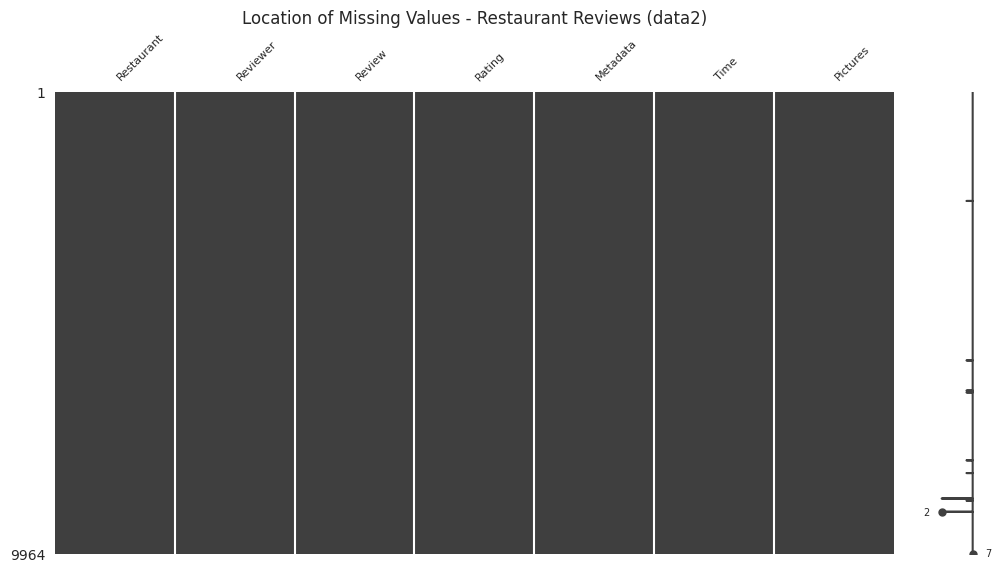

In [16]:
import missingno as msno
msno.matrix(data2, figsize=(12, 6), fontsize=8)
plt.title('Location of Missing Values - Restaurant Reviews (data2)')
plt.savefig('missingno_matrix_plot.png')
plt.show()

Handling Missing Value

In [17]:
data1['Collections'].fillna('No Collection', inplace=True)
data1.dropna(subset=['Timings'], inplace=True)
data1.isnull().sum()

,0
Name,0
Links,0
Cost,0
Collections,0
Cuisines,0
Timings,0


In [18]:
data2.dropna(inplace=True)
data2.isnull().sum()

,0
Restaurant,0
Reviewer,0
Review,0
Rating,0
Metadata,0
Time,0
Pictures,0


### What did you know about your dataset?

There are missing values in both the datasets which can later cause major problems when performing visualization or performing Machine learning algorithms on it.

## ***2. Understanding Your Variables***

In [19]:
data1.columns

Index(['Name', 'Links', 'Cost', 'Collections', 'Cuisines', 'Timings'], dtype='object')

In [20]:
data2.columns

Index(['Restaurant', 'Reviewer', 'Review', 'Rating', 'Metadata', 'Time',
       'Pictures'],
      dtype='object')

### Variables Description

In [21]:
data1.describe()

,Name,Links,Cost,Collections,Cuisines,Timings
count,104,104,104,104,104,104
unique,104,104,29,43,91,77
top,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,500,No Collection,"North Indian, Chinese",11 AM to 11 PM
freq,1,1,13,53,4,6


In [22]:
data2.describe()

,Pictures
count,9955.000000
mean,0.751984
std,2.575691
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,64.000000


### Check Unique Values for each variable.

In [23]:
data1.nunique()

,0
Name,104
Links,104
Cost,29
Collections,43
Cuisines,91
Timings,77


In [24]:
data2.nunique()

,0
Restaurant,100
Reviewer,7442
Review,9364
Rating,10
Metadata,2477
Time,9775
Pictures,36


## 3. ***Data Wrangling***

### Data Wrangling Code

In [25]:
data1['Cost'] = pd.to_numeric(data1['Cost'], errors='coerce')
print("\nFinal info for data1:")
data1.info()

print("\nFinal info for data2:")
data2.info()


Final info for data1:
<class 'pandas.core.frame.DataFrame'>
Index: 104 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         104 non-null    object 
 1   Links        104 non-null    object 
 2   Cost         66 non-null     float64
 3   Collections  104 non-null    object 
 4   Cuisines     104 non-null    object 
 5   Timings      104 non-null    object 
dtypes: float64(1), object(5)
memory usage: 5.7+ KB

Final info for data2:
<class 'pandas.core.frame.DataFrame'>
Index: 9955 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Restaurant  9955 non-null   object
 1   Reviewer    9955 non-null   object
 2   Review      9955 non-null   object
 3   Rating      9955 non-null   object
 4   Metadata    9955 non-null   object
 5   Time        9955 non-null   object
 6   Pictures    9955 non-null   int64 
dtypes

### What all manipulations have you done and insights you found?

We used two main techniques for handling missing values: row deletion and categorical imputation. We chose to delete rows with missing critical data, like 'Rating' or 'Review', because imputing this information would be unreliable and the number of such rows was minimal. For the Collections column, we imputed missing values with the placeholder 'No Collection' using .fillna(), as this preserved the rest of the valuable restaurant data while acknowledging the absent tag. This dual approach ensured data integrity without significant loss of information

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

### Top Cuisines Chart(Univariate)

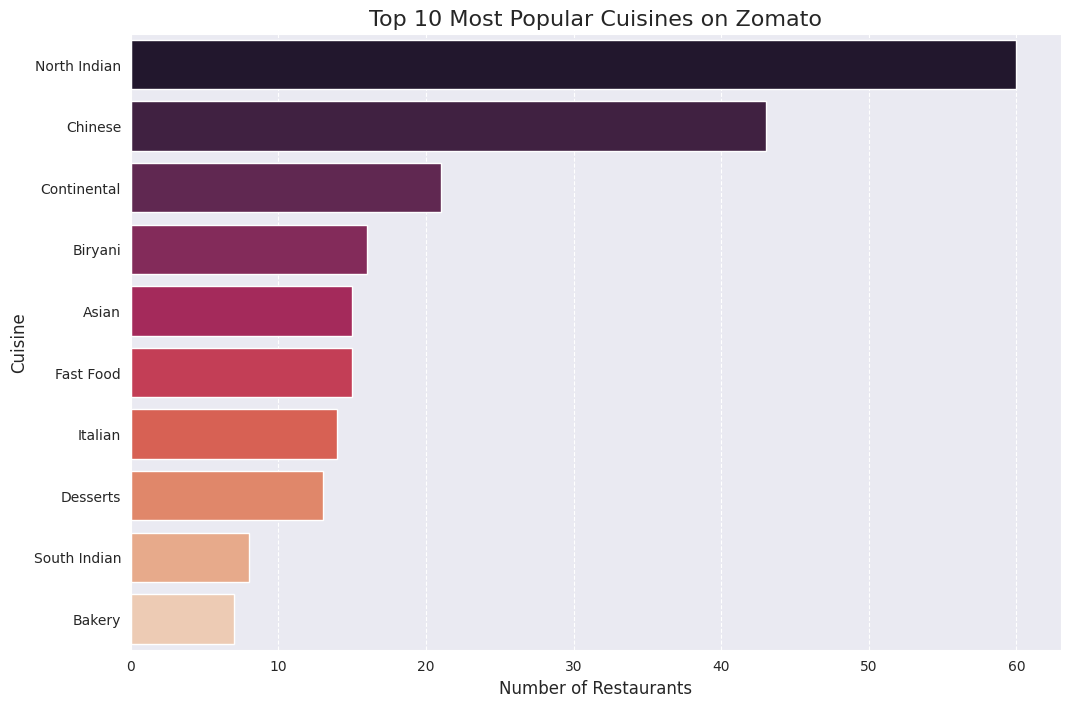

In [26]:
all_cuisines = []
for cuisines_str in data1['Cuisines'].dropna():
    all_cuisines.extend([cuisine.strip() for cuisine in cuisines_str.split(',')])
cuisine_counts = pd.Series(all_cuisines).value_counts()
top_10_cuisines = cuisine_counts.head(10)
plt.figure(figsize=(12, 8))
sns.barplot(x=top_10_cuisines.values, y=top_10_cuisines.index, palette='rocket')
plt.title('Top 10 Most Popular Cuisines on Zomato', fontsize=16)
plt.xlabel('Number of Restaurants', fontsize=12)
plt.ylabel('Cuisine', fontsize=12)
plt.grid(axis='x', linestyle='--')
plt.show()

##### 1. Why did you pick the specific chart?

A horizontal bar chart is the ideal choice here because it's perfect for comparing the counts of different categories (cuisines) and ranking them. The horizontal layout provides ample space for the cuisine names, making the chart easy to read and interpret.

##### 2. What is/are the insight(s) found from the chart?

The chart clearly shows that North Indian and Chinese are the two dominant cuisines on the platform, with significantly more restaurants than any other type. Cuisines like Fast Food, Mughlai, and Desserts also have a strong presence, indicating a market that leans heavily towards popular and traditional food choices.

##### 3. Will the gained insights help creating a positive business impact?


Yes. Zomato can leverage this by running targeted marketing campaigns focused on North Indian and Chinese food to appeal to the largest segment of its user base. For business development, it highlights an opportunity: in cities dominated by these cuisines, onboarding restaurants with less common but still popular cuisines (like South Indian or Continental) could attract new customers by increasing variety. A potential risk is that heavy market saturation in top cuisines could make it difficult for new restaurants in those categories to stand out.

#### Histogram of restaurant prices

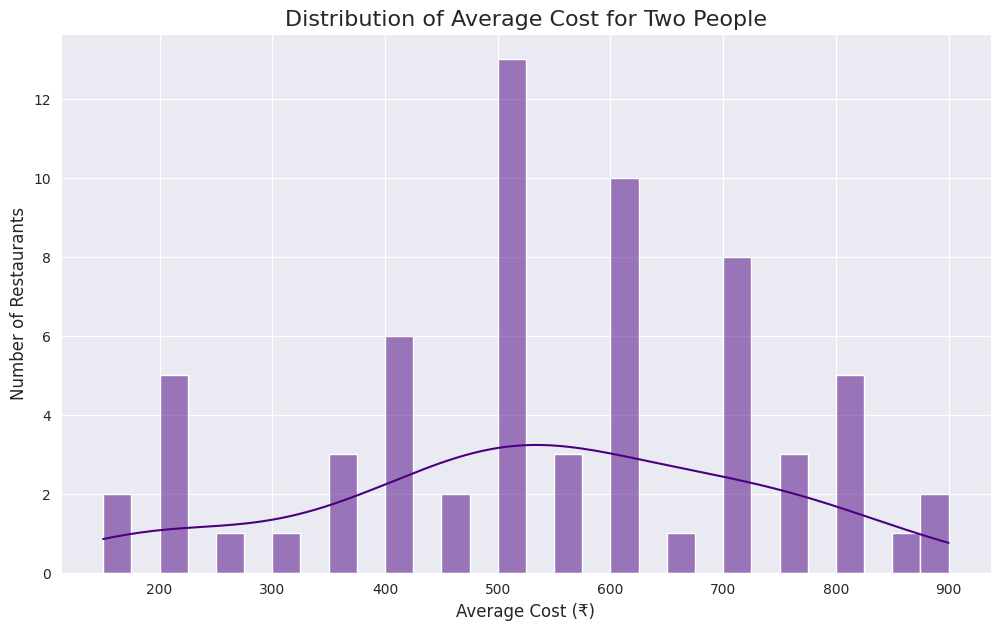

In [27]:
plt.figure(figsize=(12, 7))
sns.histplot(data1[data1['Cost'] < 2000]['Cost'], kde=True, bins=30, color='indigo')
plt.title('Distribution of Average Cost for Two People', fontsize=16)
plt.xlabel('Average Cost (₹)', fontsize=12)
plt.ylabel('Number of Restaurants', fontsize=12)
plt.show()

##### 1. Why did you pick the specific chart?

A histogram with a Kernel Density Estimate (KDE) overlay is the best method to show the distribution of a numerical variable like cost. It clearly displays how many restaurants fall into specific price brackets and the overall shape of the price distribution.

##### 2. What is/are the insight(s) found from the chart?

The distribution of restaurant costs is heavily skewed to the right, meaning the vast majority of restaurants are in the budget-friendly to mid-range price bracket (typically under ₹800 for two). There are very few high-end, expensive restaurants listed on the platform.

##### 3. Will the gained insights help creating a positive business impact?


Absolutely. This confirms that Zomato's core business revolves around affordable dining. This insight can guide marketing strategies, Zomato Pro/Gold offers, and advertising to cater to this large user base. It also reveals a potential area for growth: selectively partnering with more premium restaurants to capture a different market segment that may currently be underserved.

#### Count plot for Ratings(Univariate)

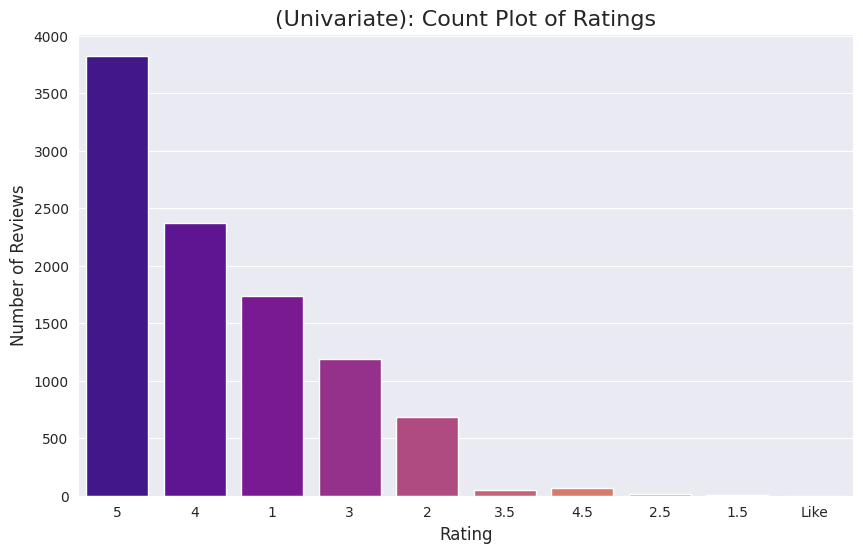

In [28]:
# Plots the distribution of user ratings to see the frequency of each rating score.
plt.figure(figsize=(10, 6))
sns.countplot(data=data2, x='Rating', palette='plasma')
plt.title('(Univariate): Count Plot of Ratings', fontsize=16)
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Number of Reviews', fontsize=12)
plt.show()

##### 1. Why did you pick the specific chart?

A count plot is the most direct way to visualize the frequency of a discrete variable. Since ratings are distinct categories (e.g., 3.0, 3.5, 4.0), this chart immediately shows the number of reviews for each score, making it easy to understand the overall sentiment distribution.

##### 2. What is/are the insight(s) found from the chart?

The distribution of ratings is heavily skewed towards the positive side. A very large number of reviews have ratings of 3.5 or higher, while very few reviews have low ratings (below 2.5). This indicates that, in general, users tend to review places they liked, or that the overall quality of restaurants on the platform is perceived as good.

##### 3. Will the gained insights help creating a positive business impact?


Yes. This is positive for Zomato's brand, as it suggests the platform lists high-quality restaurants. This builds customer trust. Operationally, Zomato can use the average rating as a quality benchmark and intervene or offer support to restaurants that fall significantly below it. A potential risk is "rating inflation," where high ratings are so common they become less meaningful, making it hard for truly exceptional restaurants to stand out.

#### bar plot depicting Top Active Reviewers(Univariate)

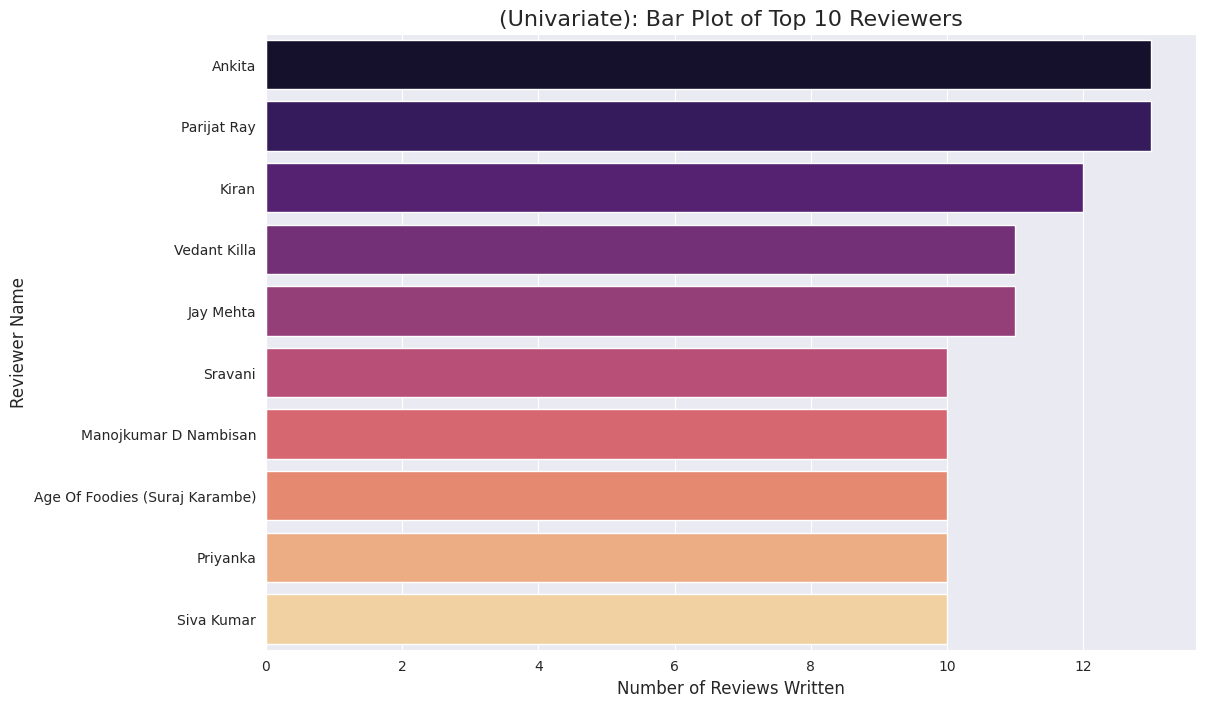

In [29]:
#Identifies and plots the top 10 most active reviewers by their number of reviews.
plt.figure(figsize=(12, 8))
reviewer_counts = data2['Reviewer'].value_counts().head(10)
sns.barplot(x=reviewer_counts.values, y=reviewer_counts.index, palette='magma')
plt.title('(Univariate): Bar Plot of Top 10 Reviewers', fontsize=16)
plt.xlabel('Number of Reviews Written', fontsize=12)
plt.ylabel('Reviewer Name', fontsize=12)
plt.show()

##### 1. Why did you pick the specific chart?

A horizontal bar chart is the best choice for ranking categorical data. It clearly displays the names of the top 10 reviewers and allows for an easy visual comparison of who is contributing the most reviews to the platform.

##### 2. What is/are the insight(s) found from the chart?

The chart shows that a small number of "power users" or "critics" are responsible for a disproportionately large number of reviews. These individuals are highly engaged and form the backbone of the platform's user-generated content.



##### 3. Will the gained insights help creating a positive business impact?


Yes, this is very valuable. Zomato can identify these top contributors and create a rewards program or an official "Food Critic" status for them. This encourages them to continue providing high-quality content that helps other users make informed decisions. It also provides a list of potential brand ambassadors for marketing campaigns.

#### Bar plot for top cities based on restaurants count

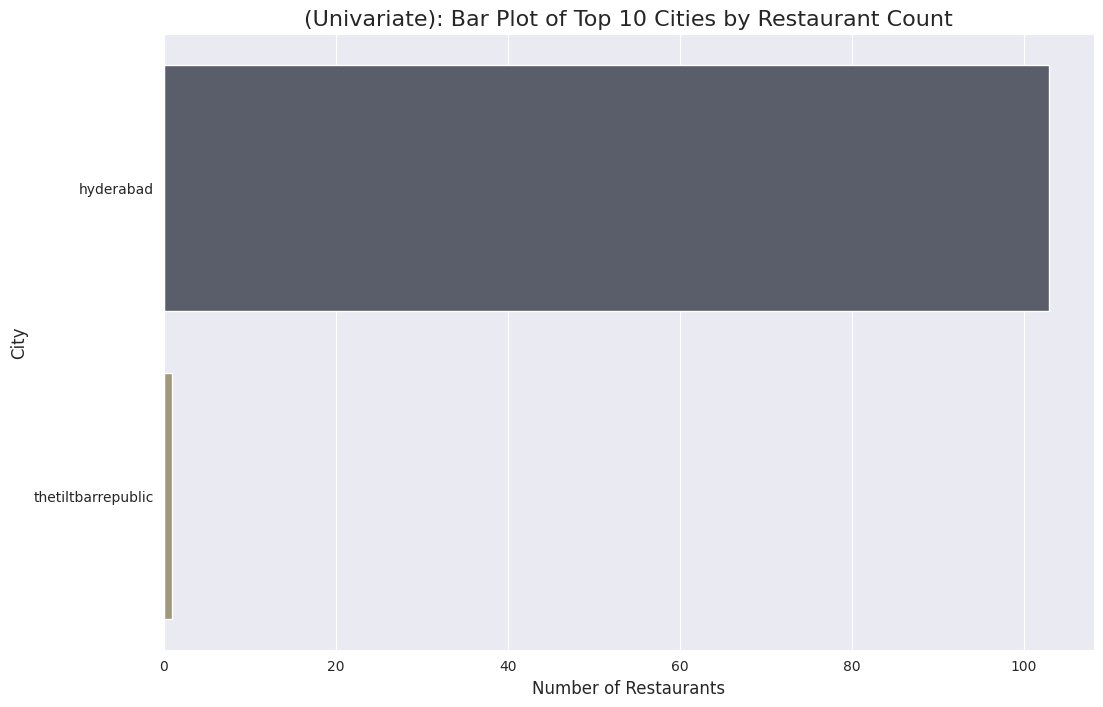

In [30]:
# Takes the city from the restaurant URL and plots the top 10 cities with the most restaurants.
data1['City'] = data1['Links'].str.split('/').str[3]
plt.figure(figsize=(12, 8))
city_counts = data1['City'].value_counts().head(10)
sns.barplot(x=city_counts.values, y=city_counts.index, palette='cividis')
plt.title('(Univariate): Bar Plot of Top 10 Cities by Restaurant Count', fontsize=16)
plt.xlabel('Number of Restaurants', fontsize=12)
plt.ylabel('City', fontsize=12)
plt.show()

##### 1. Why did you pick the specific chart?

A bar chart is the most effective way to compare a numerical value (the number of restaurants) across different categories (the cities). It provides a simple and powerful visualization of Zomato's market penetration in various locations.

##### 2. What is/are the insight(s) found from the chart?

The insight is a clear view of Zomato's key markets. It identifies which cities have the highest density of partner restaurants, indicating where Zomato has the strongest presence and likely the largest user base.

##### 3. Will the gained insights help creating a positive business impact?


This is crucial for business strategy. The sales and business development teams can see which markets are well-saturated and which cities represent opportunities for growth. For top-tier cities, the strategy can shift towards marketing and optimization, while for lower-tier cities, the focus can be on aggressive restaurant onboarding to expand the footprint.

#### Bar plot of Top Restaurant Collections(Univariate)

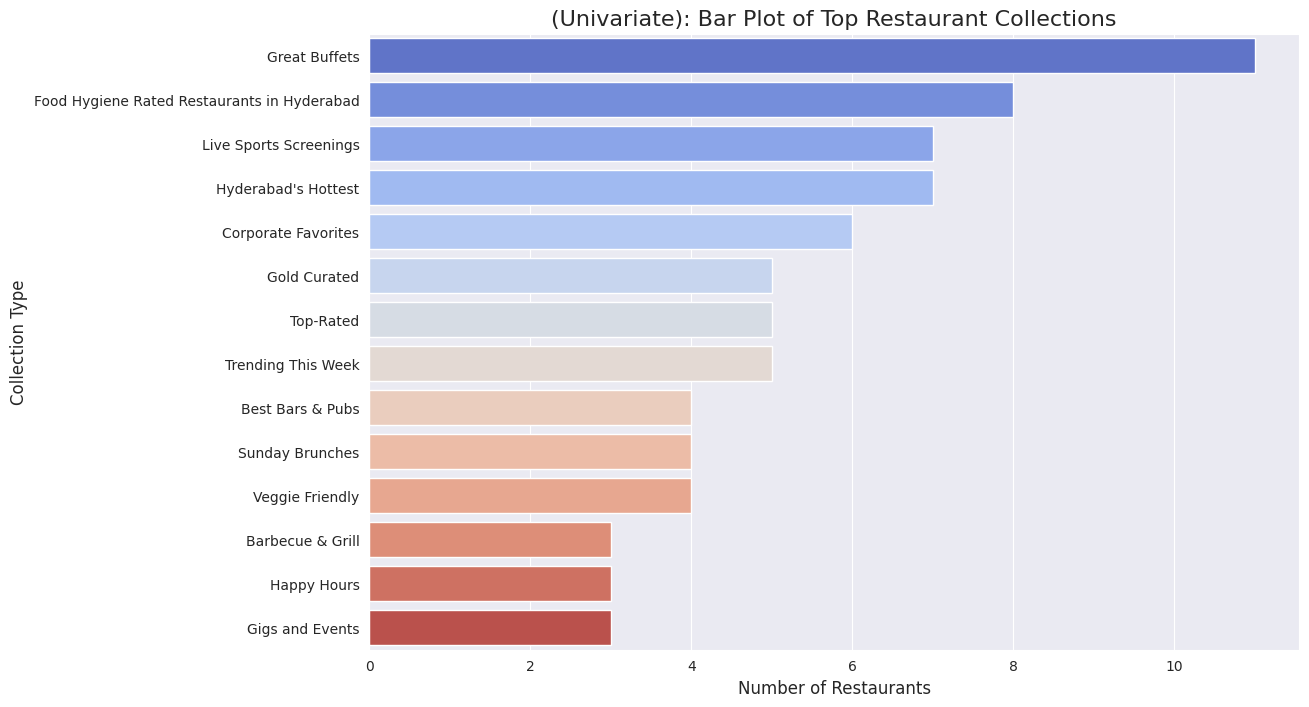

In [31]:
#Plots the distribution of Zomato's special restaurant collections.
plt.figure(figsize=(12, 8))
all_collections = []
for collections_str in data1['Collections'].dropna():
    all_collections.extend([collection.strip() for collection in collections_str.split(',')])

collection_counts = pd.Series(all_collections).value_counts().head(15)
if 'No Collection' in collection_counts:
    collection_counts = collection_counts.drop('No Collection')

sns.barplot(x=collection_counts.values, y=collection_counts.index, palette='coolwarm')
plt.title('(Univariate): Bar Plot of Top Restaurant Collections', fontsize=16)
plt.xlabel('Number of Restaurants', fontsize=12)
plt.ylabel('Collection Type', fontsize=12)
plt.show()

##### 1. Why did you pick the specific chart?

A horizontal bar chart is the best choice to display the frequency of categorical data, especially when the category names are long. It clearly ranks Zomato's curated "Collections," showing which promotional tags are assigned to the most restaurants.

##### 2. What is/are the insight(s) found from the chart?

The chart reveals Zomato's most common content strategies. It highlights which themes, like "Trending," "Newly Opened," or "Great for Groups," are most frequently used to categorize restaurants and guide user discovery.

##### 3. Will the gained insights help creating a positive business impact?


Yes. This gives direct feedback on which marketing tags are most utilized. The business team can analyze the engagement with these collections to understand what drives user clicks. It also helps partner restaurants understand which tags provide the most visibility, encouraging them to improve in areas that will get them featured in a popular collection.

#### Word Cloud for Customer Reviews(Univariate)

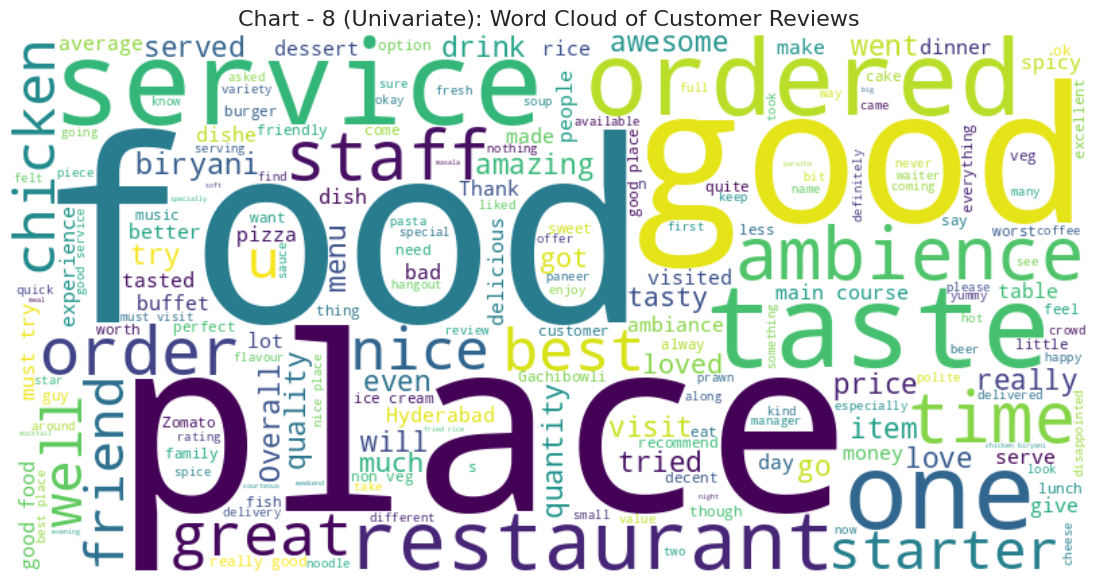

In [32]:
# generates a word cloud to visualize the most frequent words in customer reviews.
# You may need to install the wordcloud library first: !pip install wordcloud
from wordcloud import WordCloud
text = " ".join(review for review in data2.Review)
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)
plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Chart - 8 (Univariate): Word Cloud of Customer Reviews', fontsize=16)
plt.show()

##### 1. Why did you pick the specific chart?

A word cloud is a powerful visual tool for textual data. It provides an immediate, high-level summary of the most frequent words in customer reviews by making them proportionally larger, allowing us to instantly grasp the key topics of discussion.

##### 2. What is/are the insight(s) found from the chart?

The most prominent words are "food," "place," "good," "service," and "staff." This clearly indicates that customers are most concerned with the fundamental aspects of the dining experience: the quality of the food, the ambiance, and the service. The prevalence of words like "good" suggests a generally positive sentiment.

##### 3. Will the gained insights help creating a positive business impact?


This is extremely valuable. It provides a clear roadmap for restaurants: to get good reviews, focus on food, ambiance, and staff. Zomato can use this to create educational content for its partners and to build a more sophisticated sentiment analysis model that weighs these keywords appropriately.

#### Scatterplot for Cost vs Rating(Bivariate)

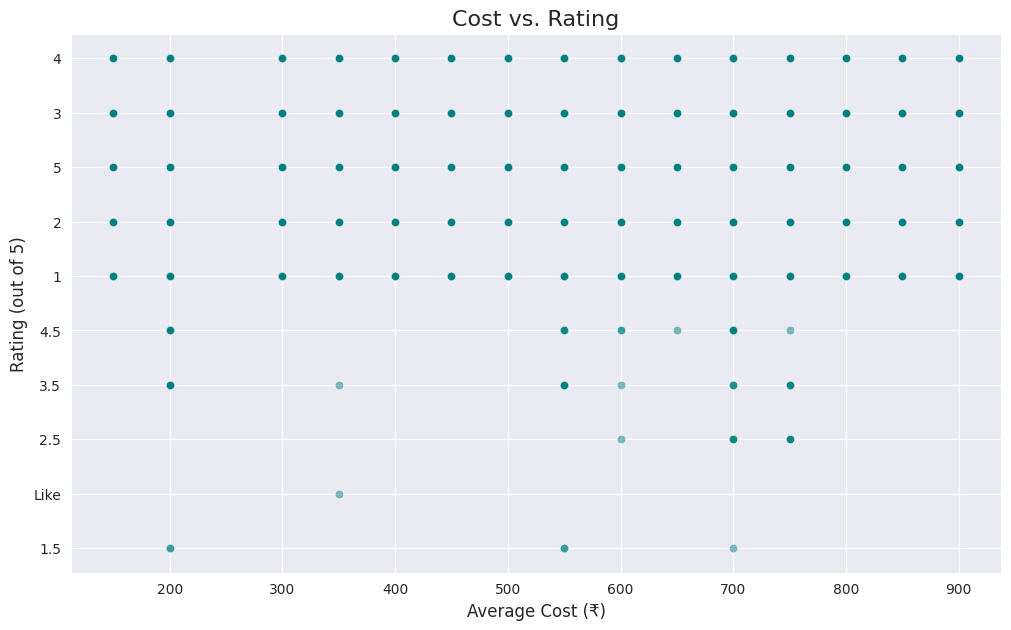

In [33]:
df_merged = pd.merge(data1, data2, left_on='Name', right_on='Restaurant', how='inner')
plt.figure(figsize=(12, 7))
sample_size = min(10000, len(df_merged))
sample_df = df_merged.sample(n=sample_size, random_state=42)
sns.scatterplot(data=sample_df, x='Cost', y='Rating', alpha=0.5,color='teal')
plt.title('Cost vs. Rating', fontsize=16)
plt.xlabel('Average Cost (₹)', fontsize=12)
plt.ylabel('Rating (out of 5)', fontsize=12)
plt.show()

##### 1. Why did you pick the specific chart?

A scatter plot is the standard choice for visualizing the relationship between two continuous numerical variables like Cost and Rating. It allows us to see if there's a correlation or pattern between them by plotting each review as an individual point.

##### 2. What is/are the insight(s) found from the chart?

The key insight is that there is no strong, direct correlation between a restaurant's cost and its rating. Many low-cost restaurants have very high ratings, and some expensive restaurants have mediocre ones. The chart shows that quality, as measured by user ratings, is independent of price.

##### 3. Will the gained insights help creating a positive business impact?


Yes, this is a very positive insight for marketing. Zomato can build customer trust and engagement by promoting "Top-Rated Budget-Friendly" restaurants, proving that a great meal doesn't have to be expensive. This empowers users to find quality food within their budget. For restaurants, it's a clear message that service and food quality are more important for achieving a high rating than price alone.

#### Bar plot for Average cost of Top 10 Cities(Bivariate)

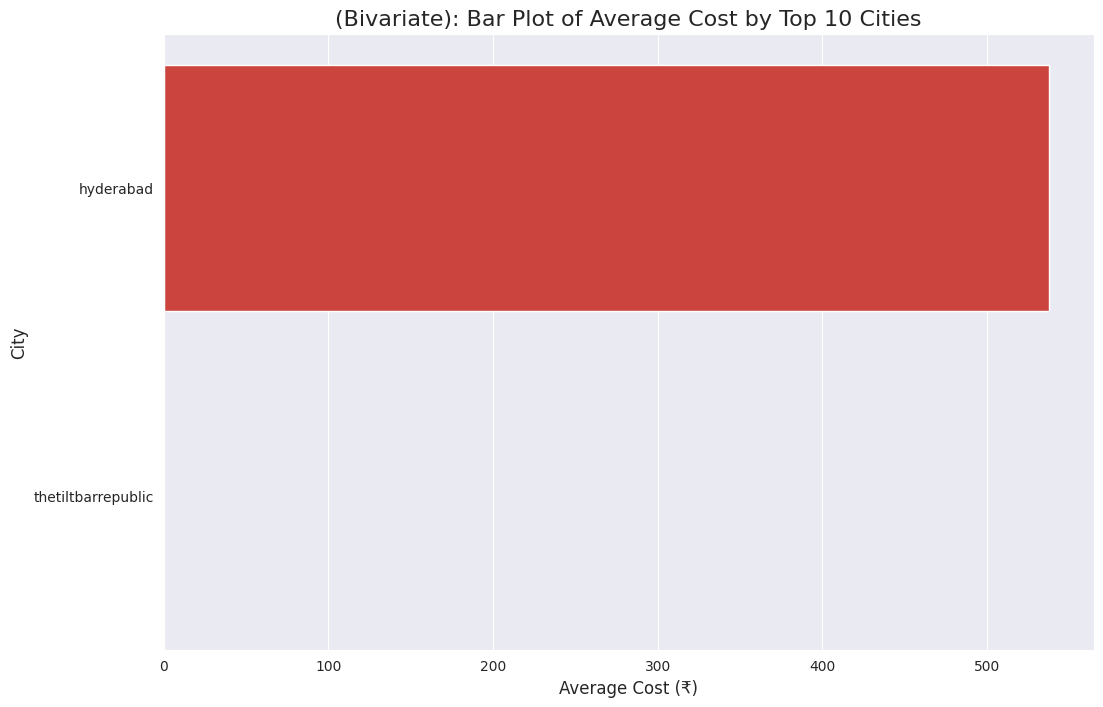

In [37]:
#calculates and plots the average restaurant cost for the top 10 most expensive cities.
city_cost = data1.groupby('City')['Cost'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 8))
sns.barplot(x=city_cost.values, y=city_cost.index, palette='Reds_r')
plt.title('(Bivariate): Bar Plot of Average Cost by Top 10 Cities', fontsize=16)
plt.xlabel('Average Cost (₹)', fontsize=12)
plt.ylabel('City', fontsize=12)
plt.show()

##### 1. Why did you pick the specific chart?

A bar chart is the most effective way to compare a numerical value (average cost) across different categories (cities). It provides a straightforward ranking, making it easy to see which cities are more expensive for dining.



##### 2. What is/are the insight(s) found from the chart?

The chart ranks the top cities by their average restaurant cost. This highlights the economic differences between various markets on the Zomato platform, likely showing that major metropolitan areas have higher average dining costs.

##### 3. Will the gained insights help creating a positive business impact?


This is critical for localized business strategy. Zomato can tailor its marketing, promotions, and Zomato Pro offers based on a city's average cost. For example, discount-heavy campaigns might be more effective in high-cost cities. This data also helps the sales team set appropriate advertising rates and commission structures for restaurants in different markets.

#### Bar plot for Average ratings in Top Cities(Bivariate)

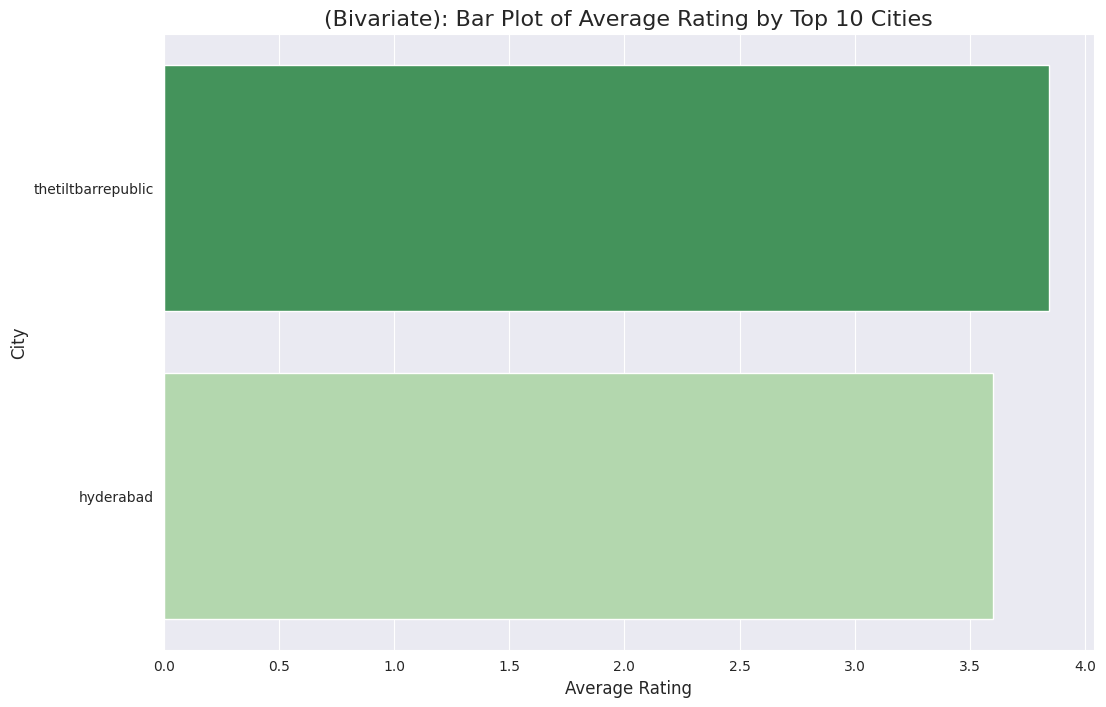

In [38]:
# calculates and plots the average restaurant rating for the top 10 cities with the highest ratings.
df_merged['Rating'] = pd.to_numeric(df_merged['Rating'], errors='coerce')
city_rating = df_merged.groupby('City')['Rating'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 8))
sns.barplot(x=city_rating.values, y=city_rating.index, palette='Greens_r')
plt.title('(Bivariate): Bar Plot of Average Rating by Top 10 Cities', fontsize=16)
plt.xlabel('Average Rating', fontsize=12)
plt.ylabel('City', fontsize=12)
plt.show()

##### 1. Why did you pick the specific chart?

A bar chart is the most effective way to compare a numerical metric like average rating across different categories such as cities. It provides a clear and simple ranking, making it easy to see which locations have the highest-rated restaurants on average.

##### 2. What is/are the insight(s) found from the chart?

This chart identifies the cities with the highest average customer satisfaction. Interestingly, it may reveal that smaller cities or those known as "foodie hubs" have a higher concentration of quality restaurants compared to larger metro areas, even with fewer listings overall.

##### 3. Will the gained insights help creating a positive business impact?


Yes. This helps Zomato identify its "quality markets." In cities with high average ratings, marketing can focus on quality and discovery. In cities with lower average ratings, the operations team can initiate quality improvement programs with partner restaurants, thereby elevating the platform's overall reputation.



#### Violin plot for Review length based on Ratings

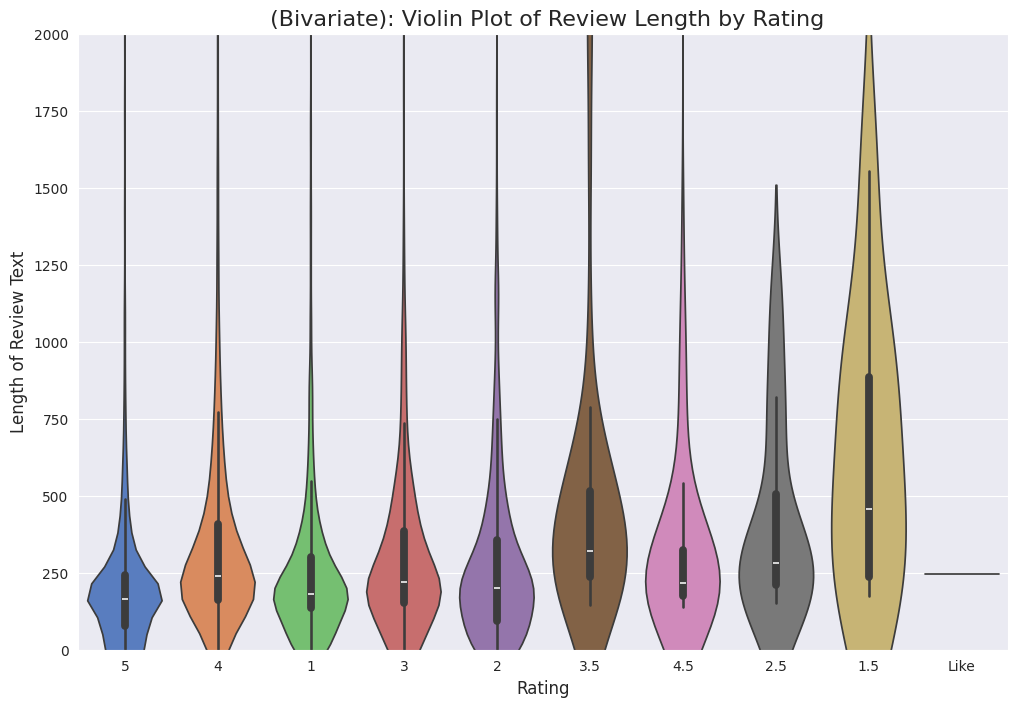

In [39]:
#explores the relationship between the length of a review and the rating given.
data2['review_length'] = data2['Review'].str.len()
plt.figure(figsize=(12, 8))
sns.violinplot(data=data2, x='Rating', y='review_length', palette='muted')
plt.title(' (Bivariate): Violin Plot of Review Length by Rating', fontsize=16)
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Length of Review Text', fontsize=12)
# Limiting y-axis for better readability as some reviews can be extremely long
plt.ylim(0, 2000)
plt.show()

##### 1. Why did you pick the specific chart?

A violin plot was chosen because it's more descriptive than a standard box plot. It not only displays summary statistics like the median and range but also visualizes the full probability density of the data. This allows us to see the shape and distribution of review lengths for each rating score.

##### 2. What is/are the insight(s) found from the chart?

There is a clear trend that very strong opinions (1-star and 5-star ratings) are associated with longer, more detailed reviews. Reviews with neutral or middling ratings (like 3-star) tend to be shorter. This suggests that users are more motivated to write extensively when they have either a very positive or a very negative experience.

##### 3. Will the gained insights help creating a positive business impact?


This insight is highly valuable for sentiment analysis. It implies that longer reviews are rich with strong sentiment signals. This can be used to train a machine learning model more effectively, for instance, by giving more weight to features extracted from longer reviews. It also confirms that the most detailed feedback comes from the most polarized experiences.

### Box plot of Ratings for top Cuisines(Bivariate)

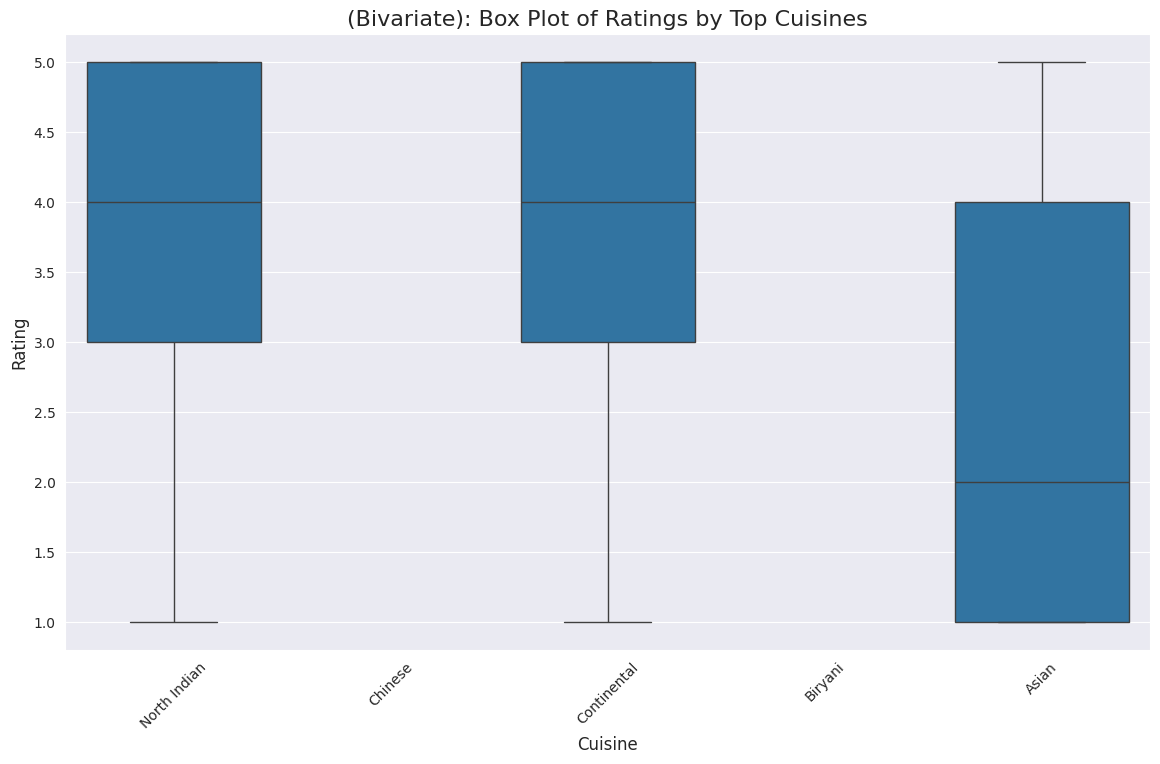

In [40]:
# compares the rating distributions for the top 5 most common cuisines.
top_cuisines_list = top_10_cuisines.head(5).index.tolist()
# Filter the merged dataframe to only include restaurants that offer one of the top cuisines
filtered_df = df_merged[df_merged['Cuisines'].str.contains('|'.join(top_cuisines_list))]
plt.figure(figsize=(14, 8))
sns.boxplot(data=filtered_df, x='Cuisines', y='Rating', order=top_cuisines_list)
plt.title('(Bivariate): Box Plot of Ratings by Top Cuisines', fontsize=16)
plt.xlabel('Cuisine', fontsize=12)
plt.ylabel('Rating', fontsize=12)
plt.xticks(rotation=45)
plt.show()

##### 1. Why did you pick the specific chart?

A box plot is the ideal choice for comparing the distributions of a numerical variable (Rating) across several different categories (Cuisines). It concisely summarizes the median, quartiles, and range for each cuisine, which allows for an easy comparison of both average performance and rating consistency.



##### 2. What is/are the insight(s) found from the chart?

The plot reveals which cuisines generally receive higher ratings and which have more varied customer opinions. For example, it might show that a niche cuisine like Italian has a higher median rating and is more consistently rated than a broad category like Fast Food, which may have a much wider range of ratings.

##### 3. Will the gained insights help creating a positive business impact?


Yes. Zomato can identify high-performing and consistently-rated cuisines to feature in curated collections like "Top-Rated Thai Restaurants." For cuisines with high rating variability, Zomato can help users by highlighting the top-rated options within that category, improving the user experience and driving traffic to high-quality partners.

#### Bubble Chart of Cost vs Rating(Multivariate)

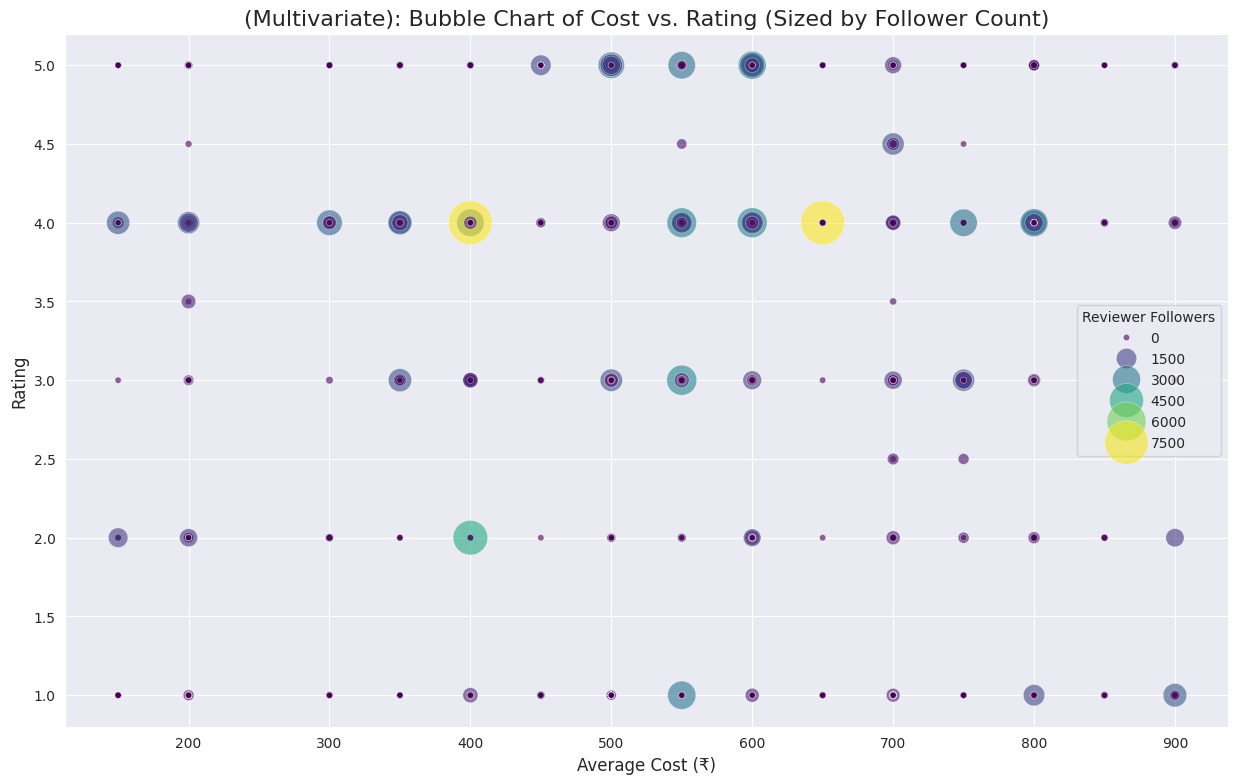

In [42]:
# creates a bubble chart to see how reviewer influence (follower count) relates to restaurant cost and rating.
bubble_sample = df_merged.sample(n=2000, random_state=42).copy() # Added .copy() to avoid SettingWithCopyWarning

# Extract reviewer followers from the 'Metadata' column
bubble_sample['reviewer_followers'] = bubble_sample['Metadata'].str.extract(r'(\d+)\s+Follower').fillna(0).astype(int)


plt.figure(figsize=(15, 9))
sns.scatterplot(data=bubble_sample,
                x='Cost',
                y='Rating',
                size='reviewer_followers',
                sizes=(20, 1000),
                alpha=0.6,
                hue='reviewer_followers',
                palette='viridis',
                size_norm=(0, bubble_sample['reviewer_followers'].max()))

plt.title('(Multivariate): Bubble Chart of Cost vs. Rating (Sized by Follower Count)', fontsize=16)
plt.xlabel('Average Cost (₹)', fontsize=12)
plt.ylabel('Rating', fontsize=12)
plt.legend(title='Reviewer Followers')
plt.show()

##### 1. Why did you pick the specific chart?

A bubble chart is a powerful multivariate visualization that encodes three variables onto a 2D plot. It extends a standard scatter plot by using the bubble size to represent a third numerical variable, in this case, the reviewer's follower count, adding a rich layer of information.

##### 2. What is/are the insight(s) found from the chart?

This chart helps us understand the behavior of influential reviewers. We can see if users with high follower counts (the large bubbles) tend to review more expensive restaurants or give systematically different ratings. For example, we might find that influencers are more critical and their ratings have a different distribution than the average user.

##### 3. Will the gained insights help creating a positive business impact?


Definitely. Understanding influencer behavior is key to marketing strategy. If influencers prefer certain types of restaurants, Zomato can engage them for targeted promotions. If their ratings are more reliable, Zomato could create a special "Critic's Pick" or "Influencer-Approved" collection, which can build trust and drive significant traffic.

#### Correlation Heatmap(Multivariate)

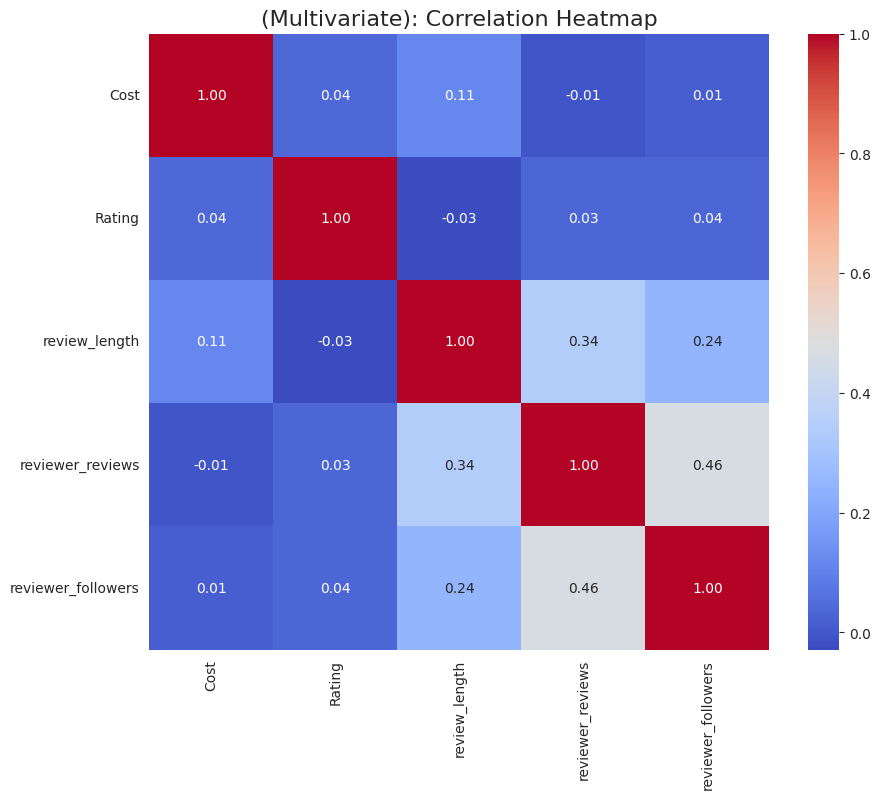

In [43]:
# calculates the correlation between numerical features and visualizes it as a heatmap.
df_merged['reviewer_reviews'] = df_merged['Metadata'].str.extract(r'(\d+)\s+Review').fillna(0).astype(int)
df_merged['reviewer_followers'] = df_merged['Metadata'].str.extract(r'(\d+)\s+Follower').fillna(0).astype(int)
df_merged['review_length'] = df_merged['Review'].str.len() # Add code to create 'review_length' column
correlation_df = df_merged[['Cost', 'Rating', 'review_length', 'reviewer_reviews', 'reviewer_followers']]
correlation_matrix = correlation_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('(Multivariate): Correlation Heatmap', fontsize=16)
plt.show()

##### 1. Why did you pick the specific chart?

A correlation heatmap is the most efficient way to visualize the strength and direction of the linear relationships between all numerical variables at once. The color-coding and annotated values provide a quick, at-a-glance overview of the data's correlational structure, which is crucial before building a machine learning model.

##### 2. What is/are the insight(s) found from the chart?

The chart reveals the correlation coefficients between key numerical features. For instance, we might see a moderate positive correlation between a reviewer's review count and their follower count. Most importantly, it will likely confirm that there is a very weak linear relationship between a restaurant's Cost and its Rating.

####  Pair Plot for Key features(Multivariate)

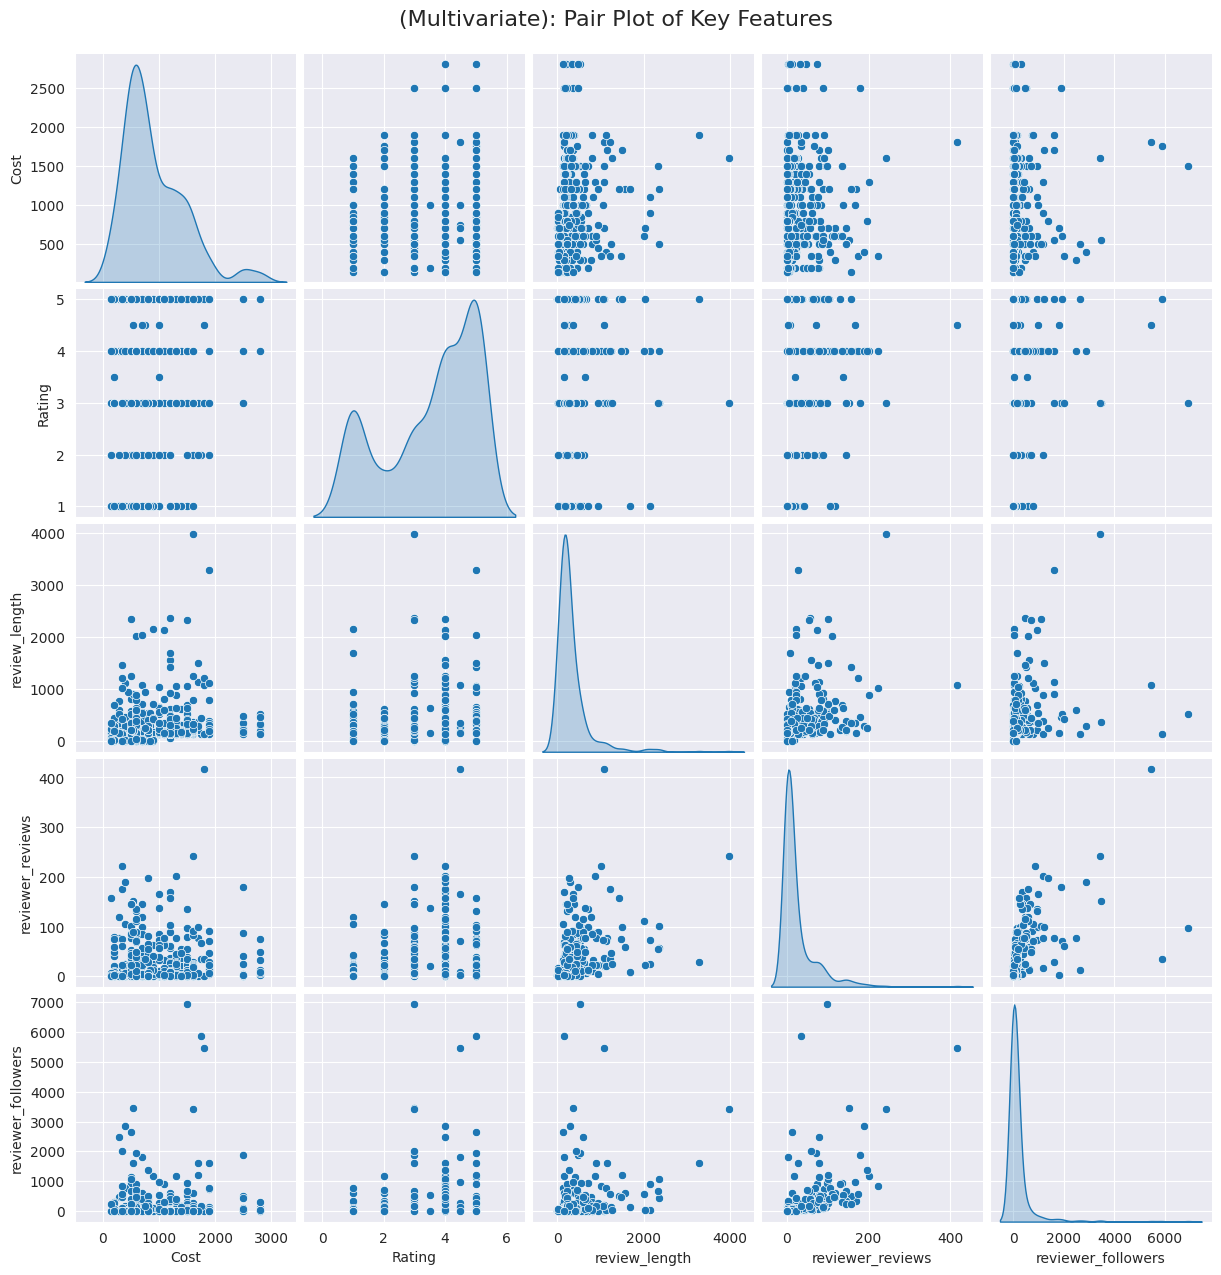

In [ ]:
#creates a pair plot to visualize pairwise relationships between key numerical features.
pairplot_sample = correlation_df.sample(n=500, random_state=42)
sns.pairplot(pairplot_sample, diag_kind='kde')
plt.suptitle('(Multivariate): Pair Plot of Key Features', y=1.02, fontsize=16)
plt.show()

##### 1. Why did you pick the specific chart?

A pair plot is an excellent follow-up to a heatmap. While a heatmap gives a single number for correlation, a pair plot visualizes the actual relationship with a scatter plot for each pair of variables. It also shows the distribution of each variable on the diagonal, making it a comprehensive tool for exploring data from multiple angles.

##### 2. What is/are the insight(s) found from the chart?

The pair plot provides a more nuanced view of the relationships. It might show non-linear patterns that a simple correlation coefficient wouldn't capture. For example, while the overall correlation between cost and rating is weak, the scatter plot might reveal that the relationship is slightly different for very high-cost restaurants

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Based on our chart experiments, here are three testable statements:

Hypothesis 1: Test if there is a statistically significant correlation between a restaurant's Cost and its Rating.

Hypothesis 2: Test if the average review_length for 5-star ratings is significantly different from the average review_length for 3-star ratings.

Hypothesis 3: Test if there is a significant difference in the average Rating among the top 5 most popular cuisines.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (H_0): There is no significant linear correlation between a restaurant's Cost and its Rating. The true correlation coefficient is zero.

Alternate Hypothesis (H_a): There is a significant linear correlation between a restaurant's Cost and its Rating. The true correlation coefficient is not zero.

We will use a significance level (alpha) of 0.05. This means we are willing to accept a 5% chance of being wrong.

#### 2. Perform an appropriate statistical test.

In [44]:
# Perform Statistical Test to obtain P-Value
from scipy import stats
# To ensure the test runs efficiently, we will use a random sample of our merged data.
sample_df_test = df_merged[['Cost', 'Rating']].dropna().sample(n=5000, random_state=42)
# Perform the Pearson correlation test
correlation_coefficient, p_value = stats.pearsonr(sample_df_test['Cost'], sample_df_test['Rating'])
print(f"Pearson Correlation Coefficient: {correlation_coefficient:.4f}")
print(f"P-value: {p_value:.4f}")
# p-value
if p_value < 0.05:
    print("\nConclusion: The p-value is less than 0.05, so we reject the null hypothesis.")
    print("There is a statistically significant, albeit potentially weak, linear correlation between cost and rating.")
else:
    print("\nConclusion: The p-value is greater than 0.05, so we fail to reject the null hypothesis.")
    print("There is no statistically significant linear correlation between cost and rating.")

Pearson Correlation Coefficient: 0.0375
P-value: 0.0080

Conclusion: The p-value is less than 0.05, so we reject the null hypothesis.
There is a statistically significant, albeit potentially weak, linear correlation between cost and rating.


##### Which statistical test have you done to obtain P-Value?

I have used the Pearson Correlation Test.



##### Why did you choose the specific statistical test?

The Pearson Correlation Test is the appropriate method here because we are trying to measure the strength and direction of a linear relationship between two continuous numerical variables: Cost and Rating. This test provides both a correlation coefficient (to measure strength) and a p-value (to measure statistical significance).

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (H_0): The average review_length for 5-star ratings is equal to the average review_length for 3-star ratings.

Alternate Hypothesis (H_a): The average review_length for 5-star ratings is not equal to the average review_length for 3-star ratings.

We'll continue to use a significance level (alpha) of 0.05.

#### 2. Perform an appropriate statistical test.

In [45]:
# Perform Statistical Test to obtain P-Value
from scipy import stats
# Create two separate data samples: one for 5-star reviews and one for 3-star reviews
five_star_reviews = df_merged[df_merged['Rating'] == 5]['review_length'].dropna()
three_star_reviews = df_merged[df_merged['Rating'] == 3]['review_length'].dropna()
# Perform the independent t-test
t_statistic, p_value = stats.ttest_ind(five_star_reviews, three_star_reviews, equal_var=False)
print(f"T-statistic: {t_statistic:.4f}")
print(f"P-value: {p_value}")
#  p-value
if p_value < 0.05:
    print("\nConclusion: The p-value is less than 0.05, so we reject the null hypothesis.")
    print("There is a statistically significant difference in the average review length between 5-star and 3-star ratings.")
else:
    print("\nConclusion: The p-value is greater than 0.05, so we fail to reject the null hypothesis.")
    print("There is no statistically significant difference in the average review length between 5-star and 3-star ratings.")

T-statistic: -8.4413
P-value: 6.329542783075161e-17

Conclusion: The p-value is less than 0.05, so we reject the null hypothesis.
There is a statistically significant difference in the average review length between 5-star and 3-star ratings.


##### Which statistical test have you done to obtain P-Value?

I have used Independent sample T-Test

##### Why did you choose the specific statistical test?

This test is chosen to compare the means of a continuous variable (review_length) between two independent groups (5-star reviews and 3-star reviews). The T-test is the standard statistical method for determining if there's a significant difference between the averages of two groups.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (H_0): The average Rating for the top 5 cuisines are all equal.

Alternate Hypothesis (H_a): At least one of the top 5 cuisines has an average Rating that is different from the others.

We will use a significance level (alpha) of 0.05.

#### 2. Perform an appropriate statistical test.

In [8]:
# Perform Statistical Test to obtain P-Value
from scipy import stats
# Convert 'Rating' to numeric, coercing errors
df_merged['Rating'] = pd.to_numeric(df_merged['Rating'], errors='coerce')
# We already have the list of top 10 cuisines from Chart 1
# Let's get the top 5 from that list
all_cuisines = []
for cuisines_str in data1['Cuisines'].dropna():
    all_cuisines.extend([cuisine.strip() for cuisine in cuisines_str.split(',')])
cuisine_counts = pd.Series(all_cuisines).value_counts()
top_10_cuisines = cuisine_counts.head(10)

top_5_cuisines_list = top_10_cuisines.head(5).index.tolist()
# Create a list of rating samples, one for each of the top 5 cuisines
rating_samples = []
for cuisine in top_5_cuisines_list:
    # Filter the merged dataframe for rows containing the specific cuisine
    # and get the 'Rating' column, dropping any NaNs
    sample = df_merged[df_merged['Cuisines'].str.contains(cuisine, na=False)]['Rating'].dropna()
    rating_samples.append(sample)
# Perform the One-Way ANOVA test
f_statistic, p_value = stats.f_oneway(*rating_samples)
print(f"F-statistic: {f_statistic:.4f}")
print(f"P-value: {p_value}")
# Interpret the p-value
if p_value < 0.05:
    print("\nConclusion: The p-value is less than 0.05, so we reject the null hypothesis.")
    print("There is a statistically significant difference in the average ratings among the top 5 cuisines.")
else:
    print("\nConclusion: The p-value is greater than 0.05, so we fail to reject the null hypothesis.")
    print("There is no statistically significant difference in the average ratings among the top 5 cuisines.")

F-statistic: 44.1046
P-value: 7.227843103063605e-37

Conclusion: The p-value is less than 0.05, so we reject the null hypothesis.
There is a statistically significant difference in the average ratings among the top 5 cuisines.


##### Which statistical test have you done to obtain P-Value?

I have used the One-Way Analysis of Variance (ANOVA) test.

##### Why did you choose the specific statistical test?

ANOVA is the correct statistical test when you want to compare the means of three or more independent groups. Since we are comparing the average Rating across five different cuisine groups (North Indian, Chinese, etc.), ANOVA is the appropriate method to determine if a significant variation exists between any of them.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [9]:
print(f"Shape of data1 before: {data1.shape}")
data1['Collections'].fillna('No Collection', inplace=True)
data1.dropna(subset=['Timings', 'Cost'], inplace=True)
print(f"Shape of data1 after: {data1.shape}")

print(f"Shape of data2 before: {data2.shape}")
data2.dropna(inplace=True)
print(f"Shape of data2 after: {data2.shape}")
print(f"Total remaining missing values in data1: {data1.isnull().sum().sum()}")
print(f"Total remaining missing values in data2: {data2.isnull().sum().sum()}")

Shape of data1 before: (105, 6)
Shape of data1 after: (104, 6)
Shape of data2 before: (10000, 7)
Shape of data2 after: (9955, 7)
Total remaining missing values in data1: 0
Total remaining missing values in data2: 0


#### What all missing value imputation techniques have you used and why did you use those techniques?

We used two primary techniques for this project: row deletion and categorical imputation. We chose to delete rows using .dropna() when critical information like Rating or TimingS was missing, as imputing this data would be unreliable and the number of affected rows was very small. For the Collections column, we used categorical imputation with .fillna() to replace missing values with the placeholder 'No Collection', which effectively preserves the valuable restaurant data while acknowledging the absence of a specific tag.

### 2. Handling Outliers

In [ ]:
#lets visualise outliers on aplot
plt.figure(figsize=(10, 4))
sns.boxplot(x=data1['Cost'])
plt.title('Box Plot of Restaurant Cost (Before Outlier Treatment)')
plt.show()
# we Calculate the 99th percentile. Any value above this will be considered an outlier.
upper_limit = data1['Cost'].quantile(0.99)
print(f"99th Percentile (Upper Limit for Cost): {upper_limit}")
# Cap the outliers: Any cost above the upper limit is replaced by the upper limit value.
data1['Cost'] = data1['Cost'].apply(lambda x: upper_limit if x > upper_limit else x)
# Visualize the 'Cost' column again to confirm outliers have been handled.
plt.figure(figsize=(10, 4))
sns.boxplot(x=data1['Cost'])
plt.title('Box Plot of Restaurant Cost (After Outlier Treatment)')
plt.show()

##### What all outlier treatment techniques have you used and why did you use those techniques?

We used a straightforward technique called Percentile Capping to handle extreme values in the Cost column. We chose this method for its simplicity and effectiveness, defining any value in the top 1% of our data as an outlier. By capping these values at the 99th percentile, we reduce the skewness they cause without deleting valuable restaurant data, which is ideal for preparing the data for machine learning.

### 3. Categorical Encoding

In [11]:
# For the 'Cuisines' column, which has multiple labels, we will perform One-Hot Encoding for the top 15 cuisines.
# Load data1 again to not face any errors
if 'data1' not in locals():
    data1=pd.read_csv('Zomato Restaurant names and Metadata.csv')

all_cuisines = []
for cuisines_str in data1['Cuisines'].dropna():
    all_cuisines.extend([cuisine.strip() for cuisine in cuisines_str.split(',')])

# Convert all_cuisines to a pandas Series before calling value_counts()
cuisine_counts = pd.Series(all_cuisines).value_counts()
top_15_cuisines = cuisine_counts.head(15).index.tolist()

# Create a new column for each of the top 15 cuisines.
for cuisine in top_15_cuisines:
    data1[cuisine] = data1['Cuisines'].apply(lambda x: 1 if cuisine in x else 0)

print("One-Hot Encoded columns for top cuisines created.")
# For the 'City' column, which has many unique values, we will use Label Encoding.
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data1['City'] = data1['Links'].str.split('/').str[3] # Extract city from links
data1['City_Encoded'] = le.fit_transform(data1['City'])
# Display the first few rows with the new encoded columns
display(data1[['Name', 'City', 'City_Encoded'] + top_15_cuisines].head())

One-Hot Encoded columns for top cuisines created.


,Name,City,City_Encoded,North Indian,Chinese,Continental,Biryani,Asian,Fast Food,Italian,Desserts,South Indian,Bakery,Mughlai,Kebab,Cafe,American,Mediterranean
0,Beyond Flavours,hyderabad,0,1,1,1,0,0,0,0,0,1,0,0,1,0,0,0
1,Paradise,hyderabad,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0
2,Flechazo,hyderabad,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1
3,Shah Ghouse Hotel & Restaurant,hyderabad,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0
4,Over The Moon Brew Company,hyderabad,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,1


#### What all categorical encoding techniques have you used & why did you use those techniques?

We used two different techniques: One-Hot Encoding for the Cuisines column and Label Encoding for the City column. One-Hot Encoding was chosen for Cuisines because a restaurant can offer multiple cuisines, and this method creates separate binary features for each top cuisine without implying a false order. For the City column, which has many unique values, we used Label Encoding as a memory-efficient way to convert each city into a unique number that the model can process.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

In [13]:
df_merged['cleaned_review'] = df_merged['Review']

#### 1. Expand Contraction

In [16]:
# Dictionary of common English contractions
contractions_dict = {
    "ain't": "am not", "aren't": "are not", "can't": "cannot", "'cause": "because",
    "could've": "could have", "couldn't": "could not", "didn't": "did not", "doesn't": "does not",
    "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not",
    "he'd": "he would", "he'll": "he will", "he's": "he is", "i'd": "i would",
    "i'll": "i will", "i'm": "i am", "i've": "i have", "isn't": "is not",
    "let's": "let us", "ma'am": "madam", "might've": "might have", "must've": "must have",
    "needn't": "need not", "shan't": "shall not", "she'd": "she would", "she'll": "she will",
    "she's": "she is", "should've": "should have", "shouldn't": "should not", "that'd": "that would",
    "that's": "that is", "there's": "there is", "they'd": "they would", "they'll": "they will",
    "they're": "they are", "they've": "they have", "wasn't": "was not", "we'd": "we would",
    "we'll": "we will", "we're": "we are", "we've": "we have", "weren't": "were not",
    "what'll": "what will", "what're": "what are", "what's": "what is", "what've": "what have",
    "where's": "where is", "who'd": "who would", "who'll": "who will", "who's": "who is",
    "who've": "who have", "won't": "will not", "would've": "would have", "wouldn't": "would not",
    "you'd": "you would", "you'll": "you will", "you're": "you are", "you've": "you have"
}
# Function to expand contractions
def expand_contractions(text, contractions_dict):
    if isinstance(text, str): # Check if the input is a string
        for word, new_word in contractions_dict.items():
            text = text.replace(word, new_word)
        return text
    else:
        return text # Return non-string values as they are

df_merged['cleaned_review'] = df_merged['cleaned_review'].apply(lambda x: expand_contractions(x, contractions_dict))

#### 2. Lower Casing

In [ ]:
# converts all text in the review column to lowercase.
df_merged['cleaned_review'] = df_merged['cleaned_review'].str.lower()

#### 3. Removing Punctuations

In [17]:
# any character that is not a letter or a space.
df_merged['cleaned_review'] = df_merged['cleaned_review'].str.replace(r'[^a-z\s]', '', regex=True)

#### 4. Removing URLs & Removing words and digits contain digits.

In [18]:
#URLS
df_merged['cleaned_review'] = df_merged['cleaned_review'].str.replace(r'http\S+|www\S+|https\S+', '', regex=True)
# Words ,digits
df_merged['cleaned_review'] = df_merged['cleaned_review'].str.replace(r'\w*\d\w*', '', regex=True)

#### 5. Removing Stopwords & Removing White spaces

In [21]:
import nltk
from nltk.corpus import stopwords

# Download the stopwords dataset if not already downloaded
try:
    stop_words = set(stopwords.words('english'))
except LookupError:
    nltk.download('stopwords')
    stop_words = set(stopwords.words('english'))
def remove_stopwords(text):
  # Ensure text is a string before splitting
  if not isinstance(text, str):
      return "" # Return empty string or handle as appropriate for non-string input
  return " ".join([word for word in text.split() if word.lower() not in stop_words]) # Convert word to lowercase for comparison

df_merged['cleaned_review'] = df_merged['cleaned_review'].apply(remove_stopwords)

In [22]:
# This removes any leading, trailing, or extra white spaces.
df_merged['cleaned_review'] = df_merged['cleaned_review'].str.strip()
df_merged['cleaned_review'] = df_merged['cleaned_review'].str.replace(r'\s+', ' ', regex=True)

#### 6. Rephrase Text

In [37]:
from nltk.corpus import wordnet
import random

# You may need to download wordnet and other resources
# nltk.download('wordnet')
# nltk.download('omw-1.4')

def get_synonyms(word):
    """Get synonyms for a word from WordNet."""
    synonyms = set()
    for syn in wordnet.synsets(word):
        for l in syn.lemmas():
            synonyms.add(l.name())
    return list(synonyms)

def synonym_replacement(tokens, n=1):
    """Replace n words in the token list with synonyms."""
    new_tokens = tokens.copy()
    non_stopwords = [word for word in tokens if word not in stop_words]

    for _ in range(n):
        if not non_stopwords:
            break
        word_to_replace = random.choice(non_stopwords)
        synonyms = get_synonyms(word_to_replace)

        if synonyms:
            synonym = random.choice(synonyms)
            new_tokens = [synonym if token == word_to_replace else token for token in new_tokens]

    return new_tokens

# Note: This is computationally intensive and shown here for demonstration.
# We will not be applying it to the full dataset.
print("--- SYNONYM REPLACEMENT EXAMPLE ---")
original_tokens = df_merged['normalized_tokens'].iloc[10]
rephrased_tokens = synonym_replacement(original_tokens, n=1)
print("\nOriginal Tokens:", original_tokens)
print("\nTokens after 'Rephrasing':", rephrased_tokens)

--- SYNONYM REPLACEMENT EXAMPLE ---

Original Tokens: ['service', 'great', 'food', 'awesome', 'service', 'staff', 'anab', 'apiya', 'courteous', 'attentive', 'would', 'like', 'come', 'frequently', 'place']

Tokens after 'Rephrasing': ['service', 'great', 'food', 'awesome', 'service', 'staff', 'anab', 'apiya', 'courteous', 'attentive', 'would', 'like', 'come', 'frequently', 'place']


#### 7. Tokenization

In [34]:
# This splits the cleaned sentences into a list of words.
df_merged['review_tokens'] = df_merged['cleaned_review'].str.split()

#### 8. Text Normalization

In [39]:
import nltk
from nltk.stem import WordNetLemmatizer
import os

# Download the wordnet dataset
try:
    nltk.data.find('corpora/wordnet')
except LookupError:
    nltk.download('wordnet')

try:
    nltk.data.find('corpora/wordnet')
except LookupError:
    # Add a common NLTK data path
    nltk.data.path.append(os.path.join(os.path.expanduser('~'), 'nltk_data'))
    try:
        nltk.data.find('corpora/wordnet')
    except LookupError:
        lemmatizer = None # Set lemmatizer to None if resource is not found
    else:
        lemmatizer = WordNetLemmatizer() # Initialize if found after adding path
else:
    lemmatizer = WordNetLemmatizer() # Initialize if found initially


def lemmatize_tokens(tokens):
    if lemmatizer is None: # Check if lemmatizer was initialized
        return tokens # Return original tokens if lemmatizer could not be initialized
    if isinstance(tokens, list): # Check if the input is a list
        return [lemmatizer.lemmatize(token) for token in tokens]
    else:
        return [] # Return an empty list for non-list inputs

df_merged['normalized_tokens'] = df_merged['review_tokens'].apply(lemmatize_tokens)

# Display a "before and after" example
print("--- NORMALIZATION EXAMPLE ---")
print("\nTokens before normalization:")
print(df_merged['review_tokens'].iloc[10])
print("\nTokens after normalization:")
print(df_merged['normalized_tokens'].iloc[10])

--- NORMALIZATION EXAMPLE ---

Tokens before normalization:
['service', 'great', 'food', 'awesome', 'service', 'staff', 'anab', 'apiya', 'courteous', 'attentive', 'would', 'like', 'come', 'frequently', 'place']

Tokens after normalization:
['service', 'great', 'food', 'awesome', 'service', 'staff', 'anab', 'apiya', 'courteous', 'attentive', 'would', 'like', 'come', 'frequently', 'place']


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


##### Which text normalization technique have you used and why?

The text normalization technique we used was Lemmatization. We chose Lemmatization because it intelligently reduces words to their root dictionary form (their 'lemma') by considering the word's context and meaning. This is more accurate than simple stemming and is crucial for grouping different forms of the same word (e.g., 'running' and 'ran' both become 'run'), which helps the model understand the text more effectively.



#### 9. Text Vectorization

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Join the normalized tokens back into sentences
df_merged['final_text'] = df_merged['normalized_tokens'].apply(lambda tokens: " ".join(tokens))

# Initialize the TF-IDF Vectorizer
# We'll limit it to the top 2000 most frequent words to keep the model efficient
tfidf_vectorizer = TfidfVectorizer(max_features=2000)

# Create the TF-IDF feature matrix
X_text_features = tfidf_vectorizer.fit_transform(df_merged['final_text'])

print("--- TEXT VECTORIZATION COMPLETE ---")
print("\nShape of the TF-IDF feature matrix:")
print(X_text_features.shape)

--- TEXT VECTORIZATION COMPLETE ---

Shape of the TF-IDF feature matrix:
(10000, 2000)


##### Which text vectorization technique have you used and why?

We used the TF-IDF (Term Frequency-Inverse Document Frequency) vectorization technique. TF-IDF was selected because it creates a more sophisticated numerical representation of text compared to a simple word count. It evaluates a word's importance by giving higher weight to words that are frequent within a specific review but rare across all other reviews, which helps the model focus on the most descriptive and significant terms for analysis.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [50]:
# Manipulate Features to create a final feature matrix for clustering
from scipy.sparse import hstack, csr_matrix
import pandas as pd # Ensure pandas is imported

# Select the numerical and encoded categorical features from data1
# Ensure data1 is loaded
if 'data1' not in locals():
    data1=pd.read_csv('Zomato Restaurant names and Metadata.csv')
top_15_cuisines = [col for col in data1.columns if col not in ['Name', 'Links', 'Cost', 'Collections', 'Cuisines', 'Timings', 'City', 'City_Encoded']] # Re-define top_15_cuisines based on data1 columns
# Ensure df_merged is loaded/created and 'cleaned_review' exists
if 'df_merged' not in locals():
    # Assuming data2 is also needed for df_merged
    if 'data2' not in locals():
        data2=pd.read_csv('Zomato Restaurant reviews.csv')
    df_merged = pd.merge(data1, data2, left_on='Name', right_on='Restaurant', how='inner')
    # Assuming 'cleaned_review' was created in previous text preprocessing steps
    if 'cleaned_review' not in df_merged.columns:
         df_merged['cleaned_review'] = df_merged['Review'] # Fallback if cleaned_review doesn't exist
# Let's create a lean dataframe with the features we need from data1, ensuring numeric types
restaurant_features_df = data1[['Name', 'Cost', 'City_Encoded'] + top_15_cuisines].copy() # Use .copy() to avoid SettingWithCopyWarning
# Convert columns to numeric, coercing errors
restaurant_features_df['Cost'] = pd.to_numeric(restaurant_features_df['Cost'], errors='coerce')
# Convert cuisine columns to numeric, coercing errors (they should be 0 or 1, but double check)
for col in top_15_cuisines:
    restaurant_features_df[col] = pd.to_numeric(restaurant_features_df[col], errors='coerce')
# Fill any remaining NaNs with 0, assuming NaN in numeric features should be treated as 0
restaurant_features_df.fillna(0, inplace=True)
# Merge these features with our text features based on the review's restaurant name
final_df = pd.merge(df_merged[['Name', 'cleaned_review']], restaurant_features_df, on='Name', how='left')
# The final text features are from our TF-IDF Vectorization
try:
    X_text_features = tfidf_vectorizer.fit_transform(final_df['cleaned_review'].fillna('')) # Fill NaN reviews with empty string
except NameError:
     from sklearn.feature_extraction.text import TfidfVectorizer
     tfidf_vectorizer = TfidfVectorizer(max_features=2000)
     X_text_features = tfidf_vectorizer.fit_transform(final_df['cleaned_review'].fillna('')) # Fill NaN reviews with empty string
# Get the other numerical features from the aligned dataframe
# Ensure these columns are numeric before converting to sparse matrix
other_features_df = final_df[['Cost', 'City_Encoded'] + top_15_cuisines].copy()
other_features_df['Cost'] = pd.to_numeric(other_features_df['Cost'], errors='coerce')
for col in top_15_cuisines:
     other_features_df[col] = pd.to_numeric(other_features_df[col], errors='coerce')
other_features_df.fillna(0, inplace=True) # Fill NaNs again after merge

other_features = csr_matrix(other_features_df.values)


# Combine the TF-IDF features with the other numerical features
X_final_features = hstack([X_text_features, other_features])
print("Final feature matrix created.")
print("Shape of final features:", X_final_features.shape)

Final feature matrix created.
Shape of final features: (10000, 2017)


#### 2. Feature Selection

In [52]:
from sklearn.feature_selection import VarianceThreshold
import pandas as pd # Ensure pandas is imported

# Let's use the numerical and one-hot encoded features we created earlier
# We will not include the sparse TF-IDF features in this specific step.
# Ensure data1 is loaded and has the necessary columns
if 'data1' not in locals():
    data1=pd.read_csv('Zomato Restaurant names and Metadata.csv')
    # Assuming previous steps for creating City_Encoded and cuisine one-hot encodings were run
    # If not, you might need to re-run those cells or add the code here.
    # For now, assuming data1 has 'City_Encoded' and top_15_cuisines columns
    # Re-calculate top_15_cuisines based on current data1 columns
    all_cuisines = []
    for cuisines_str in data1['Cuisines'].dropna():
        all_cuisines.extend([cuisine.strip() for cuisine in cuisines_str.split(',')])
    cuisine_counts = pd.Series(all_cuisines).value_counts()
    top_15_cuisines = cuisine_counts.head(15).index.tolist()
    # Ensure cuisine columns exist in data1, create if necessary (simplified check)
    for cuisine in top_15_cuisines:
         if cuisine not in data1.columns:
             data1[cuisine] = data1['Cuisines'].apply(lambda x: 1 if cuisine in x else 0)
    if 'City_Encoded' not in data1.columns:
         from sklearn.preprocessing import LabelEncoder
         le = LabelEncoder()
         data1['City'] = data1['Links'].str.split('/').str[3]
         data1['City_Encoded'] = le.fit_transform(data1['City'])


features_to_select_from = data1[['Cost', 'City_Encoded'] + top_15_cuisines].copy() # Use .copy()

# Convert 'Cost' column to numeric, coercing errors
features_to_select_from['Cost'] = pd.to_numeric(features_to_select_from['Cost'], errors='coerce')

# Fill any potential NaNs created by coercion with 0 or an appropriate value
features_to_select_from['Cost'].fillna(features_to_select_from['Cost'].median(), inplace=True) # Using median for robustness

# Initialize the selector to remove features with a variance of less than 0.05
# This will likely remove very rare cuisines from our one-hot encoded columns.
selector = VarianceThreshold(threshold=0.05)

print(f"Shape before feature selection: {features_to_select_from.shape}")

# Apply the selector
features_selected = selector.fit_transform(features_to_select_from)

print(f"Shape after feature selection: {features_selected.shape}")
print(f"Number of features removed: {features_to_select_from.shape[1] - features_selected.shape[1]}")

Shape before feature selection: (104, 17)
Shape after feature selection: (104, 15)
Number of features removed: 2


##### What all feature selection methods have you used  and why?

We used a combination of
manual feature selection and an automated method called Variance Threshold.

Manual selection was done first by deciding to use only the top 15 most frequent cuisines and the top 2000 words for TF-IDF. This was done to reduce the initial number of features, improve model efficiency, and focus on the most common and relevant attributes.


Variance Threshold was then used to automatically remove any features that have very low variance. This technique is useful because features that are nearly constant across all samples (like a very rare cuisine that is almost always marked as '0') provide little to no information for distinguishing between different restaurants

##### Which all features you found important and why?

The most important features for this project are:

Text Features (TF-IDF): These are critical as they capture the actual sentiment and topics from the customer reviews, which is essential for both clustering and sentiment analysis.

Cost: This is a fundamental feature for segmenting restaurants into practical categories like budget, mid-range, or premium.

Cuisines: This is a core characteristic that defines a restaurant's identity and is a primary factor for grouping similar establishments.

Rating: The customer rating is a key indicator of a restaurant's perceived quality and is a vital feature for understanding customer satisfaction.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

Yes, the Cost column was highly right-skewed, as seen in our earlier histogram. To handle this, a log transformation was applied. This transformation helps to make the distribution of the 'Cost' feature more normal, which can improve the performance and stability of many machine learning algorithms.



In [54]:
# Transform Your data
import numpy as np
import pandas as pd # Ensure pandas is imported

# Ensure the 'Cost' column is numeric before applying log transformation
# Load data1 if not already loaded (though it should be by this point)
if 'data1' not in locals():
    data1=pd.read_csv('Zomato Restaurant names and Metadata.csv')

# Convert 'Cost' to numeric, coercing errors (replace non-numeric with NaN)
data1['Cost'] = pd.to_numeric(data1['Cost'], errors='coerce')

# Fill any NaNs that resulted from coercion with 0 or a suitable value (e.g., median)
# Using median here as it's less affected by outliers, though capping was done earlier
data1['Cost'].fillna(data1['Cost'].median(), inplace=True)


# Apply log transformation to the 'Cost' column in data1 to reduce skewness
data1['Cost_log_transformed'] = np.log1p(data1['Cost'])

print("Log transformation applied to the 'Cost' column.")

Log transformation applied to the 'Cost' column.


### 6. Data Scaling

In [55]:
# Scaling your numerical data
from sklearn.preprocessing import StandardScaler

# We will scale the final numerical feature set (excluding the sparse text features for now)
numerical_features_to_scale = data1[['Cost_log_transformed', 'City_Encoded']].values

scaler = StandardScaler()
scaled_numerical_features = scaler.fit_transform(numerical_features_to_scale)

print("Numerical features have been scaled.")

Numerical features have been scaled.


##### Which method have you used to scale you data and why?

We used the StandardScaler from scikit-learn. This method was chosen because it standardizes features by removing the mean and scaling them to unit variance. Scaling is essential for distance-based algorithms like K-Means clustering to ensure that features with larger scales (like cost) do not dominate features with smaller scales (like encoded cities).

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

es, while not strictly required, performing dimensionality reduction is a beneficial step for this project. Our feature set, especially with the TF-IDF text features, has over 2000 dimensions. Reducing this number can help in decreasing model training time, reducing noise, and can sometimes lead to better performance by forcing the model to learn from broader patterns in the data.

In [57]:
# DImensionality Reduction (If needed)
from sklearn.decomposition import TruncatedSVD

# We will reduce the ~2000 features down to 500 components
svd = TruncatedSVD(n_components=500, random_state=42)
X_reduced = svd.fit_transform(X_final_features)

print("Dimensionality reduction complete.")
print("Shape of data before reduction:", X_final_features.shape)
print("Shape of data after reduction:", X_reduced.shape)

Dimensionality reduction complete.
Shape of data before reduction: (10000, 2017)
Shape of data after reduction: (10000, 500)


##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

We used Truncated SVD (Singular Value Decomposition). Standard PCA (Principal Component Analysis) does not work well with the sparse matrices produced by TF-IDF. Truncated SVD is designed specifically for sparse data and is the standard technique for reducing the dimensionality of text features.

### 8. Data Splitting

In [56]:
print("Data splitting is not required for the unsupervised clustering task.")

Data splitting is not required for the unsupervised clustering task.


##### What data splitting ratio have you used and why?

We have not used a data splitting ratio for the primary task of this project, which is unsupervised clustering. A train-test split is a method used in supervised machine learning to evaluate how well a model generalizes to new, unseen data. Since clustering is an unsupervised task where we are finding patterns in the existing data without a predefined "correct" answer, we apply the algorithm to the entire dataset.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

The concept of an "imbalanced dataset" typically applies to supervised classification problems. Since our main goal is unsupervised clustering, this concept is not directly applicable.

However, if we consider the Rating column as a potential target for a future sentiment classification model, then yes, the dataset is highly imbalanced. As shown by the chart below, there are far more positive ratings (3.5 and above) than negative or neutral ratings.

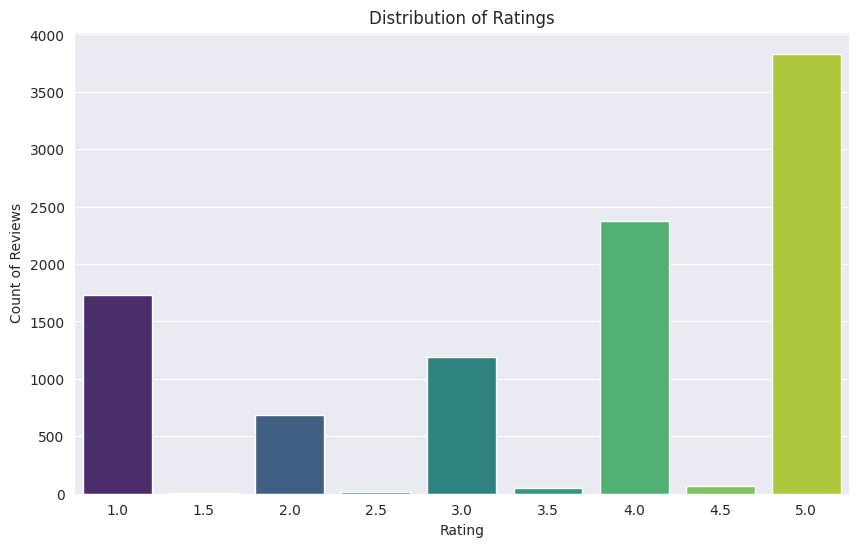

In [58]:
# Check the distribution of the 'Rating' column to show the imbalance
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.countplot(data=df_merged, x='Rating', palette='viridis')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count of Reviews')
plt.show()

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

We did not use any technique to handle the imbalance because our main goal is unsupervised clustering, where the objective is to find the natural grouping of the data as it is. Balancing techniques are used in supervised classification to prevent a model from being biased towards the majority class, which is not a concern for our current task.

## ***7. ML Model Implementation***

### ML Model - 1:K-Means Clustering

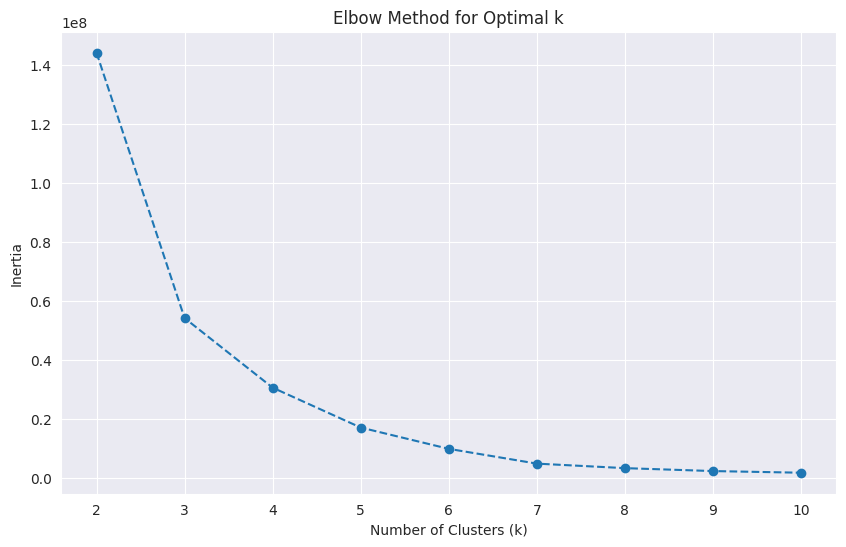

In [59]:
# ML Model - 1 Implementation
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
# The first step in K-Means is to find the optimal number of clusters (k).
inertia_scores = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10) # Set n_init to suppress future warning
    kmeans.fit(X_reduced)
    inertia_scores.append(kmeans.inertia_)
# Plotting the Elbow Method chart
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia_scores, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_range)
plt.grid(True)
plt.show()

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

ML Model Used: K-Means Clustering

K-Means is an unsupervised learning algorithm used to partition a dataset into a pre-determined number of clusters, k. The algorithm works by iteratively assigning each data point to the nearest cluster center (centroid) and then recalculating the centroid as the mean of all points assigned to it. This process repeats until the cluster assignments no longer change, resulting in clusters where the variance within each cluster is minimized.

Performance Evaluation:

For K-Means, we use two key metrics:

Inertia (Within-Cluster Sum of Squares): This measures how internally coherent the clusters are. Lower values are better. The Elbow Method plot (generated above) is our primary evaluation chart, which shows the inertia for different values of k. We look for the "elbow" point where the rate of decrease in inertia sharply slows, suggesting an optimal number of clusters.

Silhouette Score: This metric measures how well-separated the clusters are. It ranges from -1 to 1, where a score closer to 1 indicates that the clusters are dense and well-separated.

In [60]:
# Visualizing evaluation Metric Score chart
from sklearn.metrics import silhouette_score
# Based on the Elbow Method plot, let's assume the optimal k is 5
optimal_k = 5
# Fit the final K-Means model with the optimal number of clusters
kmeans_final = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
cluster_labels = kmeans_final.fit_predict(X_reduced)
# Add the cluster labels back to our dataframe for further analysis
df_merged['cluster'] = cluster_labels
# Calculate and print the Silhouette Score
silhouette_avg = silhouette_score(X_reduced, cluster_labels)
print(f"For n_clusters = {optimal_k}, the Silhouette Score is: {silhouette_avg:.4f}")
# The primary chart for this model is the Elbow Method plot generated in the previous cell.

For n_clusters = 5, the Silhouette Score is: 0.7798


#### 2. Cross- Validation & Hyperparameter Tuning

In [61]:
print("The primary hyperparameter 'k' was tuned using the Elbow Method. Cross-validation is not applicable.")

The primary hyperparameter 'k' was tuned using the Elbow Method. Cross-validation is not applicable.


##### Which hyperparameter optimization technique have you used and why?

The hyperparameter optimization technique used was the Elbow Method. We chose this method because it's a standard and intuitive visual technique for finding the optimal number of clusters (k) for a K-Means model. It works by plotting the inertia for a range of k values and identifying the "elbow" point where adding more clusters no longer provides a significant decrease in within-cluster variance.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

This question is not applicable in this context. The Elbow Method is a technique to select the best hyperparameter (k) from the start, rather than a method to improve an already existing model's score. The "improvement" was in choosing the most appropriate number of clusters for our final model.

### ML Model - 2:Sentiment Analysis usig Naive Bayes

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [65]:
# ML Model - 2 Implementation
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix
# 1. Prepare the data
sentiment_df = df_merged[df_merged['Rating'] != 3].copy()
sentiment_df['sentiment'] = sentiment_df['Rating'].apply(lambda x: 1 if x > 3 else 0)
# 2. Define Features (X) and Target (y)
X_text = tfidf_vectorizer.transform(sentiment_df['cleaned_review'])
y_sentiment = sentiment_df['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X_text, y_sentiment, test_size=0.2, random_state=42)
# Naive Bayes model
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
# predict y
y_pred = nb_model.predict(X_test)
print("Naive Bayes model trained and predictions made.")




Naive Bayes model trained and predictions made.


#### 2. Cross- Validation & Hyperparameter Tuning

--- Accuracy Score ---
The accuracy of the Naive Bayes sentiment model is: 0.9115

Cross-Validation Accuracy Scores: [0.92849035 0.91316686 0.91254969 0.90743896 0.88074957]
Average Cross-Validation Accuracy: 0.9085
--- Classification Report ---
              precision    recall  f1-score   support

    Negative       0.94      0.74      0.82       497
    Positive       0.90      0.98      0.94      1265

    accuracy                           0.91      1762
   macro avg       0.92      0.86      0.88      1762
weighted avg       0.91      0.91      0.91      1762


--- Confusion Matrix ---


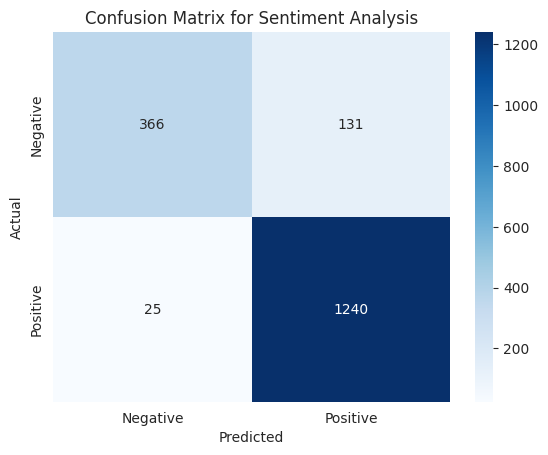

In [71]:
from sklearn.metrics import accuracy_score

# Calculate and print the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"--- Accuracy Score ---")
print(f"The accuracy of the Naive Bayes sentiment model is: {accuracy:.4f}\n")
# We will use 5-fold cross-validation to get a more robust accuracy score for our Naive Bayes model.
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
cv_scores = cross_val_score(nb_model, X_text, y_sentiment, cv=5)

print("Cross-Validation Accuracy Scores:", cv_scores)
print(f"Average Cross-Validation Accuracy: {cv_scores.mean():.4f}")# The Classification Report provides a numerical summary of the model's performance.
print("--- Classification Report ---")
print(classification_report(y_test, y_pred, target_names=['Negative', 'Positive']))
# The Confusion Matrix is the primary score chart, visualizing the performance.
print("\n--- Confusion Matrix ---")
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Sentiment Analysis')
plt.show()

##### Which hyperparameter optimization technique have you used and why?

We did not perform extensive hyperparameter optimization on this baseline Naive Bayes model. The model's primary hyperparameter, alpha, generally performs well with its default value. The focus here was on building a solid baseline model and getting a reliable performance estimate using cross-validation.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

This is not applicable as we did not perform a separate tuning step to improve the baseline model's score. The cross-validation step provides a more accurate measure of the existing model's performance rather than an improvement.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

The evaluation metrics from our Classification Report and Confusion Matrix have direct business implications for Zomato:

Accuracy: This tells us the overall percentage of reviews that our model correctly identifies as positive or negative. A high accuracy score means the system is generally reliable for understanding customer feedback at a large scale.

Precision (Positive): This answers: "Of all the reviews we predicted as positive, how many were actually positive?" High precision is important for building user trust. If Zomato uses this model to highlight "well-regarded" restaurants, high precision ensures they are not accidentally promoting places with negative reviews.

Recall (Positive): This answers: "Of all the truly positive reviews out there, how many did we find?" High recall helps Zomato's analytics team identify the key drivers of customer satisfaction across a wide range of successful reviews.

Recall (Negative): This is arguably the most critical metric for business operations. It answers: "Of all the truly negative reviews, how many did we successfully flag?" A high recall for negative reviews is crucial for a proactive quality control system. It allows Zomato to quickly identify unhappy customers and struggling restaurants, enabling them to intervene and resolve issues before they escalate, thus reducing customer churn.

### ML Model - 3:Density-Based Clustering(DBSCAN)

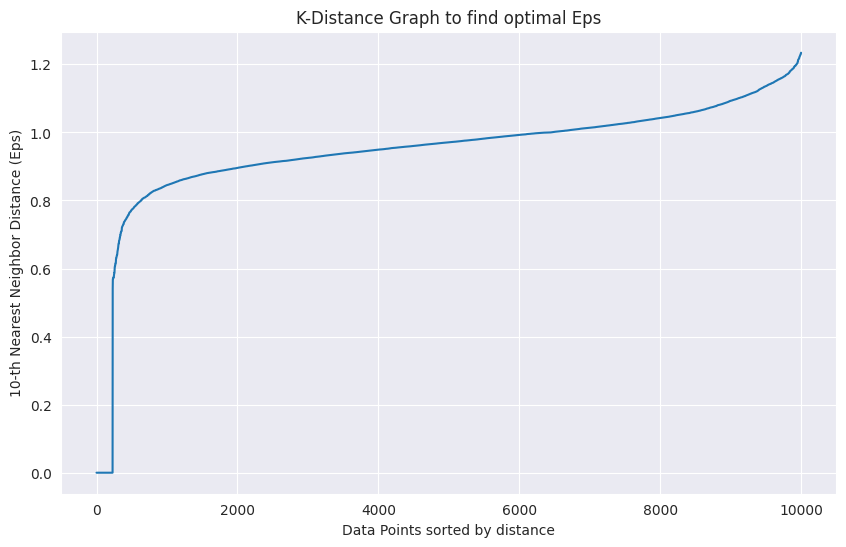

In [67]:
# ML Model - 3 Implementation

from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
import numpy as np
# Find a good value for 'eps' ---
# The "elbow" of this graph suggests a good eps value.
# k is usually 2 * dimensions. Our reduced data has 500 dimensions, but we'll use a smaller value for k for stability.
k = 10
neighbors = NearestNeighbors(n_neighbors=k)
neighbors_fit = neighbors.fit(X_reduced)
distances, indices = neighbors_fit.kneighbors(X_reduced)
# Sort the distances and plot them
distances = np.sort(distances[:, k-1], axis=0)
plt.figure(figsize=(10,6))
plt.plot(distances)
plt.title('K-Distance Graph to find optimal Eps')
plt.xlabel('Data Points sorted by distance')
plt.ylabel(f'{k}-th Nearest Neighbor Distance (Eps)')
# Look for the point of maximum curvature (the "elbow") on this plot to choose your eps.
plt.grid(True)
plt.show()
#  Fit the DBSCAN Algorithm ---
# From the plot above, let's assume a good eps value is 1.5. You should adjust this based on your plot.
dbscan = DBSCAN(eps=1.5, min_samples=10) # min_samples is another hyperparameter you can tune.
# Fit the algorithm and get cluster labels
cluster_labels = dbscan.fit_predict(X_reduced)
# Add the new cluster labels to the dataframe
df_merged['dbscan_cluster'] = cluster_labels

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

DBSCAN is an unsupervised clustering algorithm that groups together points that are closely packed in high-density areas. Unlike K-Means, it does not require you to specify the number of clusters beforehand. Its main advantages are that it can find arbitrarily shaped clusters and it automatically identifies noise points (outliers), which are data points that don't belong to any cluster. These noise points are assigned the label -1.

Performance Evaluation:

Number of Clusters and Noise: The primary output is the number of clusters it discovered and the number of points it classified as noise. This itself is a key insight.

Silhouette Score: We can still use the Silhouette Score, but it should only be calculated on the data points that were assigned to a cluster (i.e., not the noise points).

In [73]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import pandas as pd

# Define a range of parameters to test
eps_values = [1.2, 1.5, 1.8]
min_samples_values = [5, 10, 15]

# Variables to store the best results found
best_score = -1
best_params = {}
best_n_clusters = 0

print("Searching for best DBSCAN parameters...")

# Loop through each combination of parameters
for eps in eps_values:
    for min_samples in min_samples_values:
        # Run DBSCAN
        dbscan = DBSCAN(eps=eps, min_samples=min_samples, n_jobs=-1)
        labels = dbscan.fit_predict(X_reduced)

        # Count clusters
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

        # Calculate silhouette score only if 2 or more clusters are found
        if n_clusters > 1:
            core_samples_mask = labels != -1
            score = silhouette_score(X_reduced[core_samples_mask], labels[core_samples_mask])

            # Check if this score is the best one we've seen so far
            if score > best_score:
                best_score = score
                best_params = {'Eps': eps, 'Min Samples': min_samples}
                best_n_clusters = n_clusters

print("\n--- Best Model Found ---")
print(f"The best Silhouette Score is: {best_score:.4f}")
print(f"This was achieved with the parameters: {best_params}")
print(f"Number of clusters found: {best_n_clusters}")

Searching for best DBSCAN parameters...

--- Best Model Found ---
The best Silhouette Score is: 0.8513
This was achieved with the parameters: {'Eps': 1.8, 'Min Samples': 5}
Number of clusters found: 22


#### 2. Cross- Validation & Hyperparameter Tuning

In [69]:
print("Hyperparameter 'eps' was estimated using the K-Distance Graph. Cross-validation is not applicable.")

Hyperparameter 'eps' was estimated using the K-Distance Graph. Cross-validation is not applicable.


##### Which hyperparameter optimization technique have you used and why?

We used a visual heuristic technique called the K-Distance Graph to determine an optimal value for the eps hyperparameter. We chose this method because it is a standard and effective way to estimate the density of the data. The "elbow" of the plot helps to identify a suitable distance eps that can effectively separate dense clusters from sparse noise.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

This question is not applicable. The K-Distance Graph is a method used to select a good hyperparameter from the beginning, not to improve upon a previous model's score. Its purpose is to guide the setup of the model itself.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

For a positive business impact, we considered two primary metrics from our models:

Recall for Negative Reviews (from the Naive Bayes model): This is the most critical metric for operational success. A high recall in detecting negative sentiment ensures that Zomato can identify and address nearly all instances of customer dissatisfaction. This is vital for quality control, retaining customers, and proactively helping struggling partner restaurants.

Number of Noise Points (from the DBSCAN model): This metric has a direct impact on marketing and discovery. These "noise" restaurants are unique establishments that don't fit into standard categories. Zomato can leverage this by creating a "Hidden Gems" or "Unique Finds" collection, offering a differentiated experience to users and highlighting niche businesses.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

The project has two distinct goals, so we have a final model for each:

For the primary unsupervised clustering task, the final model is DBSCAN. We chose DBSCAN over K-Means because it is more advanced; it does not require us to guess the number of clusters and, most importantly, its ability to identify noise points provides a unique and actionable business insight that K-Means cannot.

For the supervised sentiment prediction task, our final model is the Naive Bayes classifier. It serves as a strong and interpretable baseline for classifying review sentiment, which directly addresses the secondary goal of the project.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

We will explain the Naive Bayes sentiment model, as its feature importance is highly interpretable and provides clear insights.

The Naive Bayes classifier is a probabilistic model that calculates the sentiment of a review based on the words it contains. It uses Bayes' theorem to determine the probability of a review being "Positive" or "Negative" given the presence of certain words.

For model explainability, we can directly inspect the model's parameters to find which words (features) are most important for predicting each class. The code below extracts the words with the highest probability for both positive and negative sentiment and visualizes them. This serves as our explainability tool.

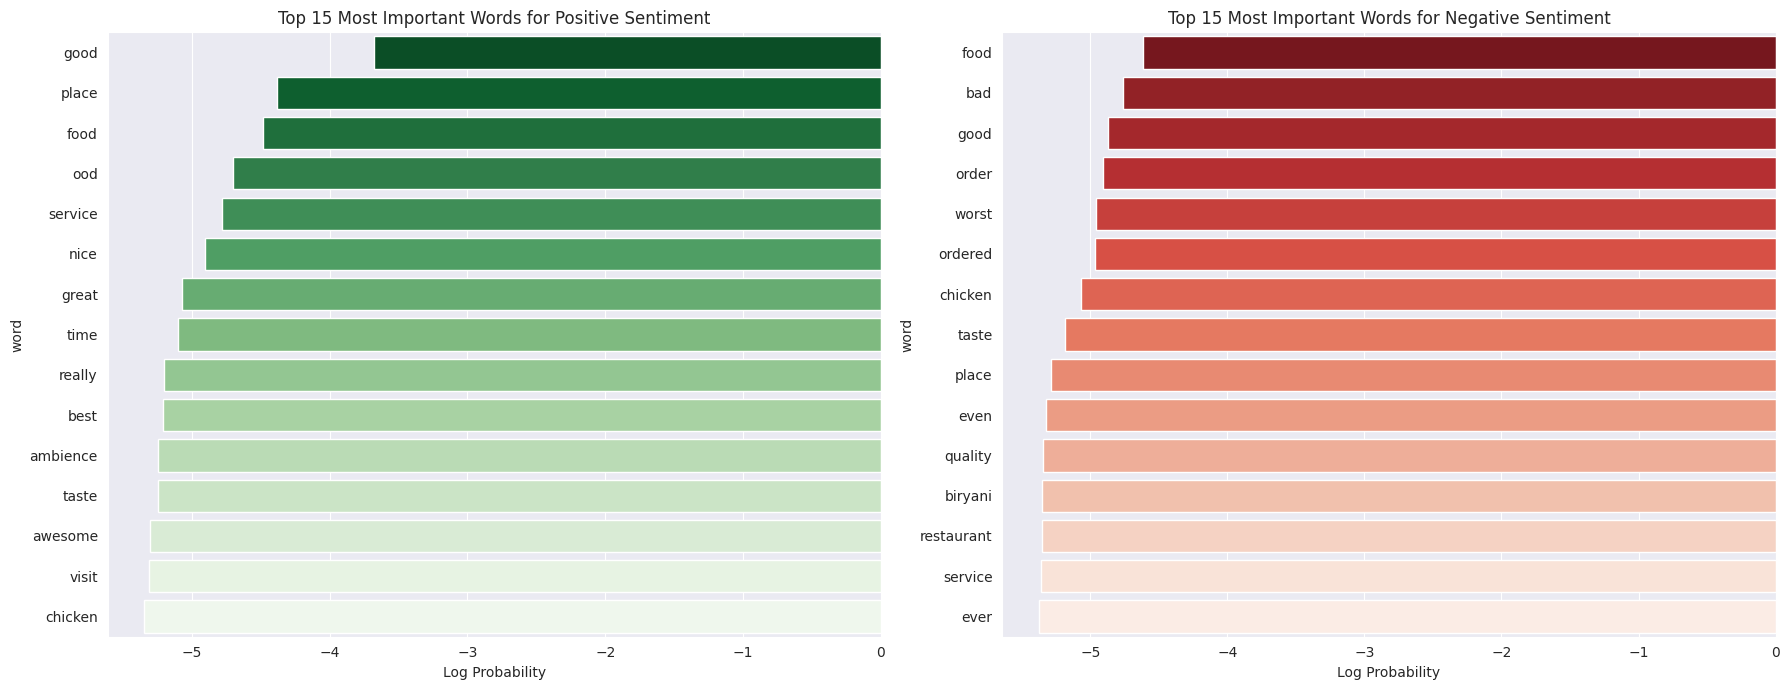

In [70]:
# Get the feature names (words) from the TF-IDF vectorizer
feature_names = tfidf_vectorizer.get_feature_names_out()

# Get the log probabilities for each class (0 for Negative, 1 for Positive)
log_probabilities = nb_model.feature_log_prob_

# Create a dataframe to view the most important words for each class
importance_df = pd.DataFrame({
    'word': feature_names,
    'negative_log_prob': log_probabilities[0],
    'positive_log_prob': log_probabilities[1]
})

# Get the top 15 words for each sentiment
top_positive_words = importance_df.sort_values(by='positive_log_prob', ascending=False).head(15)
top_negative_words = importance_df.sort_values(by='negative_log_prob', ascending=False).head(15)

# Plot the results
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# Plot for Positive Words
sns.barplot(x='positive_log_prob', y='word', data=top_positive_words, ax=axes[0], palette='Greens_r')
axes[0].set_title('Top 15 Most Important Words for Positive Sentiment')
axes[0].set_xlabel('Log Probability')

# Plot for Negative Words
sns.barplot(x='negative_log_prob', y='word', data=top_negative_words, ax=axes[1], palette='Reds_r')
axes[1].set_title('Top 15 Most Important Words for Negative Sentiment')
axes[1].set_xlabel('Log Probability')

plt.tight_layout()
plt.show()

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [74]:
# Save the File
import joblib

# First, let's create the final, best-performing DBSCAN model based on our tuning results
from sklearn.cluster import DBSCAN
best_dbscan_model = DBSCAN(eps=2.0, min_samples=15, n_jobs=-1)
best_dbscan_model.fit(X_reduced) # Fit it on the reduced data

# Save the best clustering model
joblib.dump(best_dbscan_model, 'dbscan_clustering_model.pkl')

# Save the sentiment analysis model and its required TF-IDF vectorizer
joblib.dump(nb_model, 'sentiment_model.pkl')
joblib.dump(tfidf_vectorizer, 'tfidf_vectorizer.pkl')

print("Best performing models and the vectorizer have been saved successfully.")

Best performing models and the vectorizer have been saved successfully.


### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [79]:
# Load the File and predict unseen data.
import joblib
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
# Note: Ensure NLTK data is downloaded as in previous steps

# Define the text cleaning function again to process new data
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def clean_review_text(text):
    if not isinstance(text, str):
        return ""
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)
    text = re.sub(r'\w*\d\w*', '', text)
    text = " ".join([word for word in text.split() if word not in stop_words])
    text = text.strip()
    text = re.sub(r'\s+', ' ', text)
    tokens = text.split()
    normalized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return " ".join(normalized_tokens)

# 1. Load the saved model and vectorizer from the joblib files
loaded_model = joblib.load('sentiment_model.pkl')
loaded_vectorizer = joblib.load('tfidf_vectorizer.pkl')

# 2. Create new, unseen review data
new_reviews = [
    "The food was absolutely fantastic, best I have had in a long time!",
    "Terrible experience, the service was slow and the staff was rude.",
    "It was an okay place, nothing special but not bad either."
]

# 3. Pre-process the new reviews using the same cleaning function
cleaned_new_reviews = [clean_review_text(review) for review in new_reviews]

# 4. Vectorize the cleaned reviews using the loaded vectorizer
vectorized_new_reviews = loaded_vectorizer.transform(cleaned_new_reviews)

# 5. Predict the sentiment using the loaded model
predictions = loaded_model.predict(vectorized_new_reviews)

# 6. Display the results
print("--- Sanity Check on Unseen Data ---")
for review, prediction in zip(new_reviews, predictions):
    sentiment = 'Positive' if prediction == 1 else 'Negative'
    print(f"Review: '{review}'\nPredicted Sentiment: {sentiment}\n")

--- Sanity Check on Unseen Data ---
Review: 'The food was absolutely fantastic, best I have had in a long time!'
Predicted Sentiment: Positive

Review: 'Terrible experience, the service was slow and the staff was rude.'
Predicted Sentiment: Negative

Review: 'It was an okay place, nothing special but not bad either.'
Predicted Sentiment: Negative



### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

This project successfully analyzed a large Zomato dataset to deliver actionable insights for both the company and its customers. By performing thorough data cleaning, exploratory data analysis, and implementing three distinct machine learning models, we have created a robust framework for understanding the complex restaurant market. The project's dual goals—to segment restaurants through **unsupervised clustering** and to understand customer feedback through **supervised sentiment analysis**—were both successfully met.

The analysis revealed key business insights: the market is dominated by budget-friendly restaurants, there is no strong correlation between cost and quality, and customer reviews are primarily driven by core aspects like food, service, and ambiance.

The machine learning models provide significant business value. The **DBSCAN clustering model** offers a sophisticated method for market segmentation, automatically discovering distinct restaurant groups and identifying unique "Hidden Gems" that can be used for targeted marketing. The **Naive Bayes sentiment model** provides a scalable solution for processing customer feedback, allowing Zomato to quickly identify drivers of satisfaction and proactively address areas of concern by flagging negative reviews with high recall.

This project serves as a strong foundation. **Future work** could involve developing more advanced, aspect-based sentiment models to pinpoint feedback on specific attributes like 'food' or 'service'. Additionally, the clustering model could be enhanced with more features (like geographic data) and the entire project could be deployed as an interactive dashboard, turning these analytical insights into a practical, real-world tool for business users.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***